## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

pd.options.display.max_columns = 60
pd.options.display.max_rows = 60

In [2]:
df_cab = pd.read_csv('YourCabs.csv')

In [3]:
df_cab.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [4]:
df_cab.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,25541.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,41507.974840,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,305.144945,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,25569.020830,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,41480.521110,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,41517.761550,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,41558.914630,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


## Data Preprocessing

In [5]:
# id and user_id columns can be dropped as they wont influence the cancellation of the ride
df_cab.drop(['id', 'user_id'], axis = 1, inplace = True)

In [6]:
df_cab.head()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [7]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     43431 non-null  int64  
 1   package_id           7550 non-null   float64
 2   travel_type_id       43431 non-null  int64  
 3   from_area_id         43343 non-null  float64
 4   to_area_id           34293 non-null  float64
 5   from_city_id         16345 non-null  float64
 6   to_city_id           1588 non-null   float64
 7   from_date            43431 non-null  object 
 8   to_date              25541 non-null  float64
 9   online_booking       43431 non-null  int64  
 10  mobile_site_booking  43431 non-null  int64  
 11  booking_created      43431 non-null  object 
 12  from_lat             43338 non-null  float64
 13  from_long            43338 non-null  float64
 14  to_lat               34293 non-null  float64
 15  to_long              34293 non-null 

In [8]:
df_cab.isnull().sum()

vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

In [9]:
# finding the percentage of missing values in the columns where there are missing values

null_percent = []
columns_null = ['package_id', 'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'to_date', 'from_lat', 
                'from_long', 'to_lat', 'to_long']

for col in columns_null:
    null_percent.append(df_cab[col].isnull().sum() * 100 / df_cab[col].shape[0])

df_null_percent = pd.DataFrame(data = null_percent, index = columns_null)

df_null_percent[df_null_percent[0] > 10].sort_values(by = 0, ascending = False)

,0
to_city_id,96.343626
package_id,82.616104
from_city_id,62.365591
to_date,41.191775
to_area_id,21.040271
to_lat,21.040271
to_long,21.040271


- We can remove the features 'to_city_id', 'package_id', 'from_city_id', 'to_area_id' as they have large percentage of missing values and being ID's they wont influence the car_cancellation. <br>

- 'to_date' could have been used to study the influence of no. of days of booking on the cancellation. But imputing 41% of data might introduce bias in the model. So it is better to drop it. <br>

- But in the case of 'to_lat' and 'to_long' we need to keep it to study the influence of the distance of travel on cancelleation and the missing values are 21% which can be imputed. <br>

In [10]:
df_cab.drop(['package_id', 'to_area_id', 'from_city_id', 'to_city_id', 'to_date'], axis = 1, inplace = True)

**Extracting date and time info from 'from_date' and 'booking_created' timestamps**

In [11]:
df_cab['from_date_dt'] = pd.to_datetime(df_cab['from_date']).dt.strftime('%m/%d/%y')
df_cab['from_date_tm'] = pd.to_datetime(df_cab['from_date']).dt.strftime('%H:%M')

df_cab['booking_created_dt'] = pd.to_datetime(df_cab['booking_created']).dt.strftime('%m/%d/%y')
df_cab['booking_created_tm'] = pd.to_datetime(df_cab['booking_created']).dt.strftime('%H:%M')

In [12]:
df_cab.head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_dt,from_date_tm,booking_created_dt,booking_created_tm
0,28,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,01/01/13,02:00,01/01/13,01:39
1,12,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,01/01/13,09:00,01/01/13,02:25
2,12,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,01/01/13,03:30,01/01/13,03:08
3,12,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,01/01/13,05:45,01/01/13,04:39
4,12,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,01/01/13,09:00,01/01/13,07:53


In [13]:
#getting the day of the week and the month name from the dates
df_cab['from_date_day'] = pd.to_datetime(df_cab['from_date_dt']).dt.day_name()
df_cab['from_date_month'] = pd.to_datetime(df_cab['from_date_dt']).dt.month_name()

df_cab['booking_created_day'] = pd.to_datetime(df_cab['booking_created_dt']).dt.day_name()
df_cab['booking_created_month'] = pd.to_datetime(df_cab['booking_created_dt']).dt.month_name()

In [14]:
# segregating the day into weekday or weeekend
df_cab['from_date_week'] = np.where(((df_cab['from_date_day'] == 'Saturday') | (df_cab['from_date_day'] == 'Sunday')),
                                    'Weekend', 'Weekday')

df_cab['booking_created_week'] = np.where(((df_cab['booking_created_day'] == 'Saturday') | (df_cab['booking_created_day'] == 'Sunday')),
                                    'Weekend', 'Weekday')

In [15]:
# Categorising booking start time into 'Late Night','Early Morning','Late morning','Afternoon','Evening' and 'Night'
time_bins = [(pd.to_datetime(df_cab['from_date_tm']).dt.hour.between(0,4)),
            (pd.to_datetime(df_cab['from_date_tm']).dt.hour.between(5,7)),
            (pd.to_datetime(df_cab['from_date_tm']).dt.hour.between(8,11)),
            (pd.to_datetime(df_cab['from_date_tm']).dt.hour.between(12,15)),
            (pd.to_datetime(df_cab['from_date_tm']).dt.hour.between(16,19)),
            (pd.to_datetime(df_cab['from_date_tm']).dt.hour.between(20,24))
            ]

time_labels = ['Late Night','Early Morning','Late morning','Afternoon','Evening','Night']

df_cab['from_date_session'] = np.select(time_bins, time_labels)

In [16]:
# Categorising time of booking into 'Late Night','Early Morning','Late morning','Afternoon','Evening' and 'Night'
time_bins = [(pd.to_datetime(df_cab['booking_created_tm']).dt.hour.between(0,4)),
            (pd.to_datetime(df_cab['booking_created_tm']).dt.hour.between(5,7)),
            (pd.to_datetime(df_cab['booking_created_tm']).dt.hour.between(8,11)),
            (pd.to_datetime(df_cab['booking_created_tm']).dt.hour.between(12,15)),
            (pd.to_datetime(df_cab['booking_created_tm']).dt.hour.between(16,19)),
            (pd.to_datetime(df_cab['booking_created_tm']).dt.hour.between(20,24))
            ]

time_labels = ['Late Night','Early Morning','Late morning','Afternoon','Evening','Night']

df_cab['booking_created_session'] = np.select(time_bins, time_labels)

In [17]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         43431 non-null  int64  
 1   travel_type_id           43431 non-null  int64  
 2   from_area_id             43343 non-null  float64
 3   from_date                43431 non-null  object 
 4   online_booking           43431 non-null  int64  
 5   mobile_site_booking      43431 non-null  int64  
 6   booking_created          43431 non-null  object 
 7   from_lat                 43338 non-null  float64
 8   from_long                43338 non-null  float64
 9   to_lat                   34293 non-null  float64
 10  to_long                  34293 non-null  float64
 11  Car_Cancellation         43431 non-null  int64  
 12  from_date_dt             43431 non-null  object 
 13  from_date_tm             43431 non-null  object 
 14  booking_created_dt    

In [18]:
df_cab.head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_dt,from_date_tm,booking_created_dt,booking_created_tm,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,28,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,01/01/13,02:00,01/01/13,01:39,Tuesday,January,Tuesday,January,Weekday,Weekday,Late Night,Late Night
1,12,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,01/01/13,09:00,01/01/13,02:25,Tuesday,January,Tuesday,January,Weekday,Weekday,Late morning,Late Night
2,12,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,01/01/13,03:30,01/01/13,03:08,Tuesday,January,Tuesday,January,Weekday,Weekday,Late Night,Late Night
3,12,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,01/01/13,05:45,01/01/13,04:39,Tuesday,January,Tuesday,January,Weekday,Weekday,Early Morning,Late Night
4,12,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,01/01/13,09:00,01/01/13,07:53,Tuesday,January,Tuesday,January,Weekday,Weekday,Late morning,Early Morning


In [19]:
# calculating the difference in time between the time of booking and the booking start time, in minutes
df_cab['time_diff'] = (pd.to_datetime(df_cab['from_date']) - pd.to_datetime(df_cab['booking_created'])).dt.total_seconds() / 60.0

In [20]:
df_cab.head(-1)

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_dt,from_date_tm,booking_created_dt,booking_created_tm,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,28,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,01/01/13,02:00,01/01/13,01:39,Tuesday,January,Tuesday,January,Weekday,Weekday,Late Night,Late Night,21.0
1,12,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,01/01/13,09:00,01/01/13,02:25,Tuesday,January,Tuesday,January,Weekday,Weekday,Late morning,Late Night,395.0
2,12,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,01/01/13,03:30,01/01/13,03:08,Tuesday,January,Tuesday,January,Weekday,Weekday,Late Night,Late Night,22.0
3,12,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,01/01/13,05:45,01/01/13,04:39,Tuesday,January,Tuesday,January,Weekday,Weekday,Early Morning,Late Night,66.0
4,12,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,01/01/13,09:00,01/01/13,07:53,Tuesday,January,Tuesday,January,Weekday,Weekday,Late morning,Early Morning,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,12,2,585.0,11/25/2013 0:00,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0,11/25/13,00:00,11/24/13,14:24,Monday,November,Sunday,November,Weekday,Weekend,Late Night,Afternoon,576.0
43426,12,2,1147.0,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0,11/24/13,18:00,11/24/13,14:25,Sunday,November,Sunday,November,Weekend,Weekend,Evening,Afternoon,215.0
43427,12,2,393.0,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0,11/26/13,01:00,11/24/13,14:30,Tuesday,November,Sunday,November,Weekday,Weekend,Late Night,Afternoon,2070.0
43428,12,3,974.0,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0,11/24/13,18:30,11/24/13,14:35,Sunday,November,Sunday,November,Weekend,Weekend,Evening,Afternoon,235.0


In [21]:
# Since we have used the below columns to create new columns with more insight, we can drop them
df_cab.drop(columns = ['from_date', 'booking_created', 'from_date_dt', 'from_date_tm', 'booking_created_dt', 
                    'booking_created_tm'], axis = 1, inplace = True)

In [22]:
df_cab.head()

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,28,2,83.0,0,0,12.924150,77.672290,12.927320,77.635750,0,Tuesday,January,Tuesday,January,Weekday,Weekday,Late Night,Late Night,21.0
1,12,2,1010.0,0,0,12.966910,77.749350,12.927680,77.626640,0,Tuesday,January,Tuesday,January,Weekday,Weekday,Late morning,Late Night,395.0
2,12,2,1301.0,0,0,12.937222,77.626915,13.047926,77.597766,0,Tuesday,January,Tuesday,January,Weekday,Weekday,Late Night,Late Night,22.0
3,12,2,768.0,0,0,12.989990,77.553320,12.971430,77.639140,0,Tuesday,January,Tuesday,January,Weekday,Weekday,Early Morning,Late Night,66.0
4,12,2,1365.0,0,0,12.845653,77.677925,12.954340,77.600720,0,Tuesday,January,Tuesday,January,Weekday,Weekday,Late morning,Early Morning,67.0


In [23]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         43431 non-null  int64  
 1   travel_type_id           43431 non-null  int64  
 2   from_area_id             43343 non-null  float64
 3   online_booking           43431 non-null  int64  
 4   mobile_site_booking      43431 non-null  int64  
 5   from_lat                 43338 non-null  float64
 6   from_long                43338 non-null  float64
 7   to_lat                   34293 non-null  float64
 8   to_long                  34293 non-null  float64
 9   Car_Cancellation         43431 non-null  int64  
 10  from_date_day            43431 non-null  object 
 11  from_date_month          43431 non-null  object 
 12  booking_created_day      43431 non-null  object 
 13  booking_created_month    43431 non-null  object 
 14  from_date_week        

## Exploratory Data Analysis(EDA):

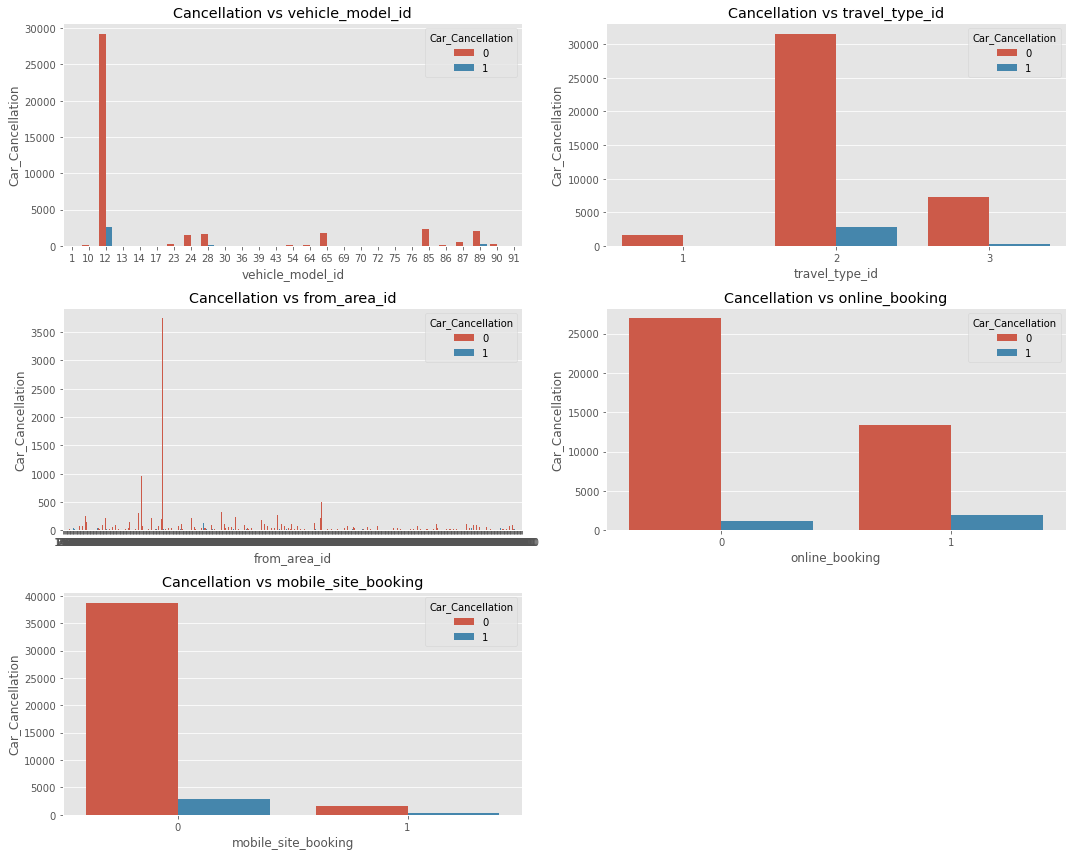

In [25]:
# Checking Cancellation for Different Columns/Features of the Data by plotting bars:

col_1 = ['vehicle_model_id', 'travel_type_id', 'from_area_id', 'online_booking', 'mobile_site_booking']

fig1, ax1 = plt.subplots(3, 2, figsize = (15,12))
ax1[-1,-1].set_visible(False)

for i1, ax_1 in enumerate(ax1.flat):
    if i1 < len(col_1):
        sns.countplot(data = df_cab, x = col_1[i1], hue = 'Car_Cancellation', ax = ax_1)
        ax_1.set_title(f'Cancellation vs {col_1[i1]}')
        ax_1.set_xlabel(col_1[i1])
        ax_1.set_ylabel('Car_Cancellation')
        
plt.tight_layout()
plt.show()

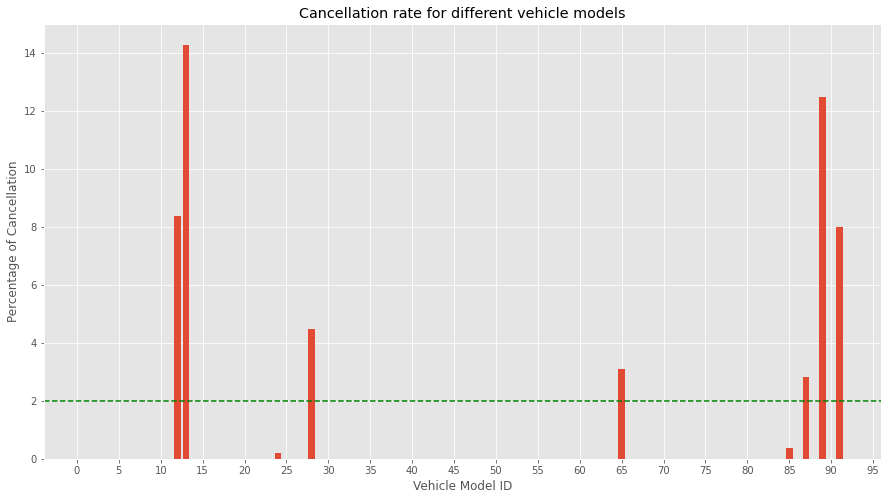

In [26]:
# Cancellation vs vehicle_model_id
# Cancellation rate for different vehicle models

# unique vehicle models
l1_bar = df_cab['vehicle_model_id'].value_counts().index

# number of cancellations for each of the models
l2_bar = []
for i in l1_bar:
    l2_bar.append(df_cab[(df_cab['vehicle_model_id'] == i) & (df_cab['Car_Cancellation'] == 1)].shape[0])

# number of bookings for each model
l3_bar = df_cab['vehicle_model_id'].value_counts().values.tolist()

# Cancellation rate for different vehicle models
l4_bar = []
for i in range(len(l1_bar)):
        l4_bar.append((l2_bar[i]/l3_bar[i]) * 100)

plt.figure(figsize = (15,8))        
plt.bar(l1_bar, l4_bar)
plt.axhline(np.mean(l4_bar), color = 'green', linestyle = '--')
plt.xlabel('Vehicle Model ID')
plt.ylabel('Percentage of Cancellation')
plt.title('Cancellation rate for different vehicle models')
plt.xticks(np.arange(0,100,5))
plt.show()

In [27]:
# Checking the models which have cancellation rate of more than 5%
[print(f'Vehicle Model: {l1_bar[l4_bar.index(i)]} -- Cancellation Rate: {i:.2f}%') for i in l4_bar if i > 5] 

Vehicle Model: 12 -- Cancellation Rate: 8.37%
Vehicle Model: 89 -- Cancellation Rate: 12.46%
Vehicle Model: 91 -- Cancellation Rate: 8.00%
Vehicle Model: 13 -- Cancellation Rate: 14.29%


[None, None, None, None]

In [28]:
# Checking how much percentage of the total bookings are made up of these 4 model ids
high_cancel_model = [12, 13, 89, 91]
for i in high_cancel_model:
    percentage = round((df_cab[df_cab['vehicle_model_id']==i]['vehicle_model_id'].value_counts()/len(df_cab) * 100).iloc[0],
                    2)
    print(f"Vehicle Model: {i} -- Percentage of Total: {percentage}%")

Vehicle Model: 12 -- Percentage of Total: 73.36%
Vehicle Model: 13 -- Percentage of Total: 0.02%
Vehicle Model: 89 -- Percentage of Total: 5.51%
Vehicle Model: 91 -- Percentage of Total: 0.06%


<b>Observations:</b><br>
- We are able to infer that the Cancellation rate was higher for some models as compared to others.<br>
- The Cancellation rate varies from 0 - 14.29 %. <br>
- In the case of the model id 12 where the cancellation rate is 14.29%, we are able to see that, that particular model had the highest number of bookings making up nearly 73.36% of the total bookings so it is justified.<br>

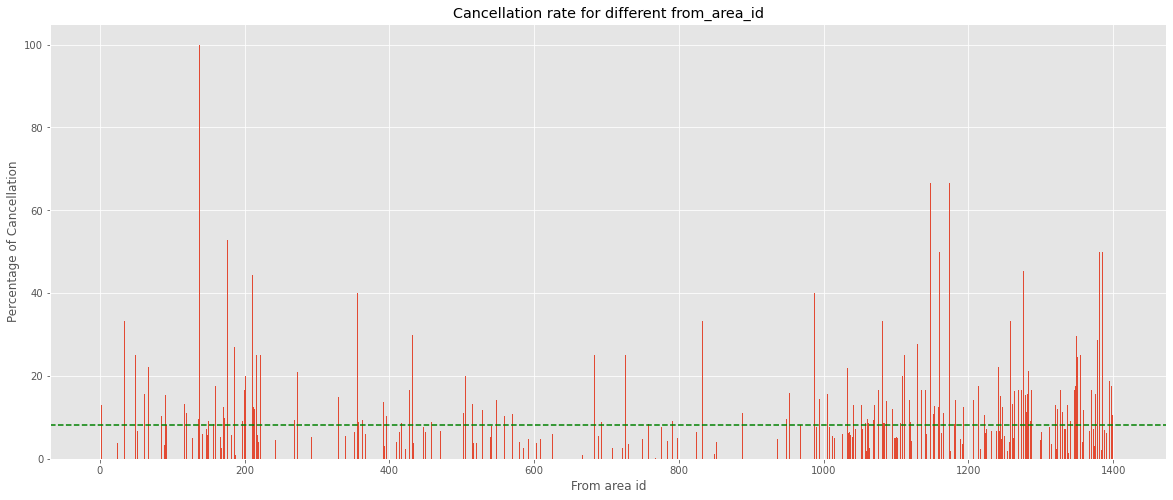

In [29]:
# Cancellation vs from_area_id
# comparing the cancellation rate for different from_area_id

# unique from_area_id
l1_bar = df_cab['from_area_id'].value_counts().index

# number of cancellations for each of the from_area_id
l2_bar = []
for i in l1_bar:
    l2_bar.append(df_cab[(df_cab['from_area_id'] == i) & (df_cab['Car_Cancellation'] == 1)].shape[0])

# total number of each from_area_id
l3_bar = df_cab['from_area_id'].value_counts().values.tolist()

# number of cancellations as a percentage of the total number of each from_area_id
l4_bar = []
for i in range(len(l1_bar)):
        l4_bar.append((l2_bar[i]/l3_bar[i]) * 100)

plt.figure(figsize = (20,8))        
plt.bar(l1_bar, l4_bar)
plt.axhline(np.mean(l4_bar), color = 'green', linestyle = '--')
plt.xlabel('From area id')
plt.ylabel('Percentage of Cancellation')
plt.title('Cancellation rate for different from_area_id')
plt.show()

In [30]:
df_cab[df_cab['Car_Cancellation'] == 1]['from_area_id'].value_counts().sort_values(ascending = False)

from_area_id
571.0     127
393.0     116
293.0      99
83.0       68
1010.0     53
         ... 
1270.0      1
1193.0      1
1322.0      1
358.0       1
1161.0      1
Name: count, Length: 405, dtype: int64

In [31]:
df_cab[df_cab['from_area_id'] == 571].shape[0] / len(df_cab) * 100

3.755382100343073

In [32]:
# getting the index of the of the bar in the 'Cancellation rate for different from_area_id' plot where the 
# cancellation rate is 100
l4_bar.index(100)

573

In [33]:
# getting the from_area_id from the above index
l1_bar[573]

138.0

In [34]:
# viewing all the rows having the same from_area_id
df_cab[df_cab['from_area_id'] == 138]

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
34763,89,2,138.0,1,0,12.98226,77.60339,12.99586,77.596411,1,Tuesday,September,Tuesday,September,Weekday,Weekday,Night,Evening,117.0


<b>Observations:</b><br>
- Certain from_area_id have higher cancellation rate as indicated by from_area_id 571 which had the highest number of cancellations at 127 but it only makes up 3.75% of the total bookings made. <br>
- 100 perecent cancellation in from_area_id 138 was because only 1 booking was made for that from_area_id and 
it was cancelled.

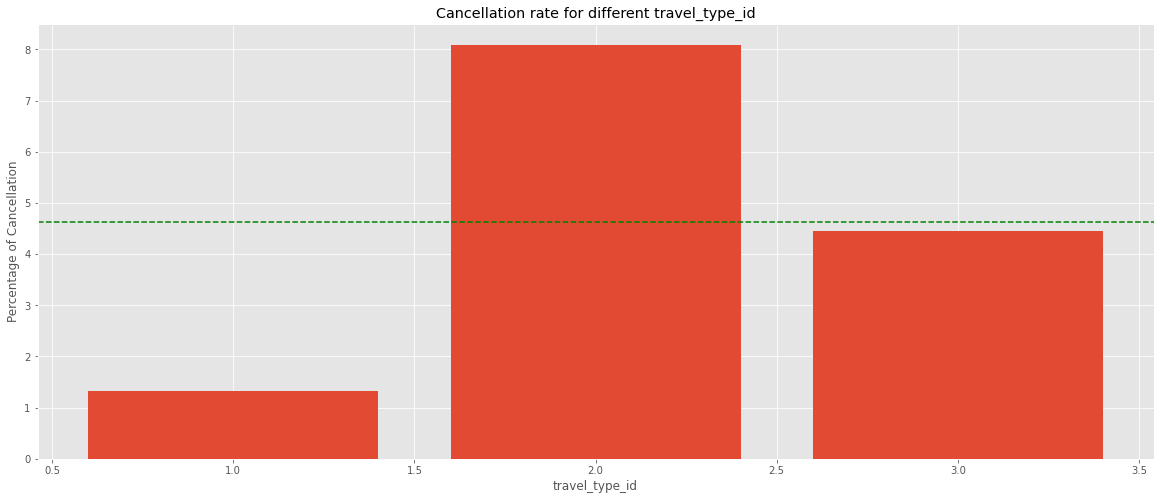

In [35]:
# Cancellation vs travel_type_id
# comparing the cancellation rate for different travel_type_id

# unique from_area_id
l1_bar = df_cab['travel_type_id'].value_counts().index

# number of cancellations for each of the from_area_id
l2_bar = []
for i in l1_bar:
    l2_bar.append(df_cab[(df_cab['travel_type_id'] == i) & (df_cab['Car_Cancellation'] == 1)].shape[0])

# total number of each from_area_id
l3_bar = df_cab['travel_type_id'].value_counts().values.tolist()

# number of cancellations as a percentage of the total number of each from_area_id
l4_bar = []
for i in range(len(l1_bar)):
        l4_bar.append((l2_bar[i]/l3_bar[i]) * 100)

plt.figure(figsize = (20,8))        
plt.bar(l1_bar, l4_bar)
plt.axhline(np.mean(l4_bar), color = 'green', linestyle = '--')
plt.xlabel('travel_type_id')
plt.ylabel('Percentage of Cancellation')
plt.title('Cancellation rate for different travel_type_id')
plt.show()

In [36]:
# Checking how much percentage of the total bookings are made up of these 3 travel_type_ids

for i in l1_bar:
    percentage = round((df_cab[df_cab['travel_type_id']==i]['travel_type_id'].value_counts()/len(df_cab) * 100).iloc[0],
                    2)
    print(f"Travel_type_ids: {i} -- Percentage of Total: {percentage}%")

Travel_type_ids: 2 -- Percentage of Total: 78.96%
Travel_type_ids: 3 -- Percentage of Total: 17.38%
Travel_type_ids: 1 -- Percentage of Total: 3.66%


<b>Observations:</b><br>
- For travel_type_id the Cancellation rate is observed to be proportional to the number of bookings under each travel_type_id

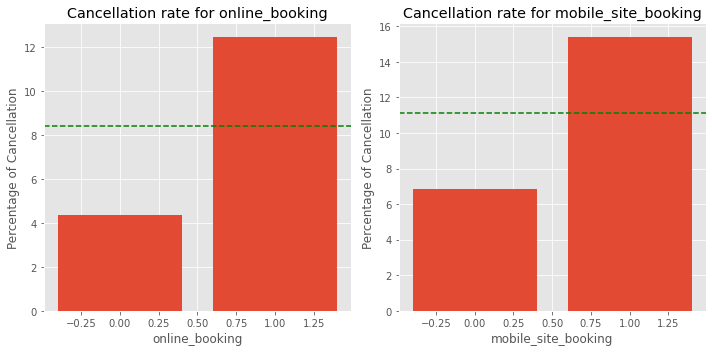

In [37]:
# Checking Cancellation Rate for Different Columns/Features of the Data by plotting bars:

col_2 = ['online_booking', 'mobile_site_booking']

fig2, ax2 = plt.subplots(1, 2, figsize = (10,5))

for i2, ax_2 in enumerate(ax2.flat):
    if i2 < len(col_2):
        l1_bar = df_cab[col_2[i2]].value_counts().index  # 0 and 1
        
        l2_bar = []
        for i in l1_bar:
            l2_bar.append(df_cab[(df_cab[col_2[i2]] == i) & (df_cab['Car_Cancellation'] == 1)].shape[0])        
        
        l3_bar = df_cab[col_2[i2]].value_counts().values.tolist()
        
        l4_bar = []
        for i in range(len(l1_bar)):
            l4_bar.append((l2_bar[i]/l3_bar[i]) * 100)
                
        ax_2.bar(l1_bar, l4_bar)
        ax_2.axhline(np.mean(l4_bar), color = 'green', linestyle = '--')
        ax_2.set_xlabel(col_2[i2])
        ax_2.set_ylabel('Percentage of Cancellation')
        ax_2.set_title(f'Cancellation rate for {col_2[i2]}')
     
        
plt.tight_layout()
plt.show()

In [38]:
ovl_can = round(len(df_cab[(df_cab['Car_Cancellation']==1)]) / len(df_cab) * 100, 2)

onl_per = round(len(df_cab[(df_cab['online_booking']==1)]) / len(df_cab) * 100, 2)

onl_can = round(len(df_cab[(df_cab['online_booking']==1) & (df_cab['Car_Cancellation']==1)]['online_booking']) / 
len(df_cab[df_cab['online_booking']==1]['online_booking']) * 100, 2)

print(f'Overall Cancellation rate: {ovl_can}%')
print(f'Percentage of total bookings made through online site: {onl_per}%')
print(f'Online_Booking Cancellation Rate: {onl_can}%')

Overall Cancellation rate: 7.21%
Percentage of total bookings made through online site: 35.16%
Online_Booking Cancellation Rate: 12.46%


In [39]:
mob_per = round(len(df_cab[(df_cab['mobile_site_booking']==1)]) / len(df_cab) * 100, 2)

mob_can = round(len(df_cab[(df_cab['mobile_site_booking']==1) & (df_cab['Car_Cancellation']==1)]['mobile_site_booking']) / 
      len(df_cab[df_cab['mobile_site_booking']==1]['mobile_site_booking']) *100, 2)

print(f'Percentage of total bookings made through mobile site: {mob_per}%')
print(f'Mobile Site Booking Cancellation Rate: {mob_can}%')

Percentage of total bookings made through mobile site: 4.32%
Mobile Site Booking Cancellation Rate: 15.39%


<b>Observations:</b><br>
- Bookings made through online medium such as bookings made through websites on computers or mobiles are found to have a higher cancellation rate.<br>
- Out of the total bookings, 35.16% were made through the online site with a cancellation rate of 12.4%. In comparison, even though only 4.3% of total bookings were made through the mobile site, it had a higher cancellation rate of 15.3%. <br>
- It is possible that the ease of access to cancel bookings may have contributed to the higher cancellation rate for online and mobile site bookings.

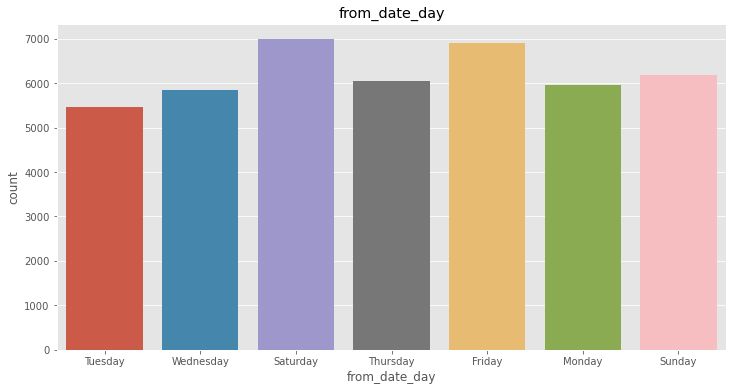

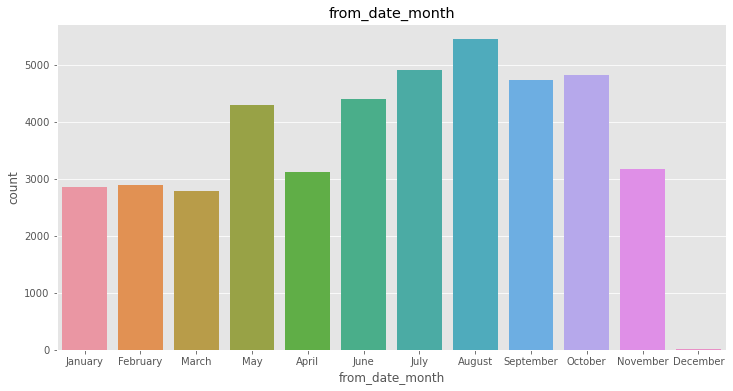

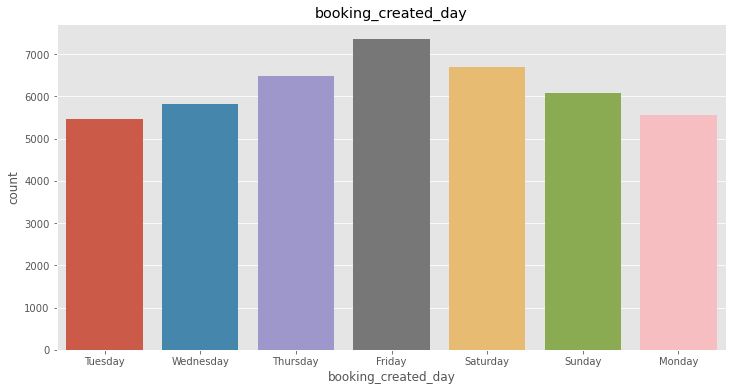

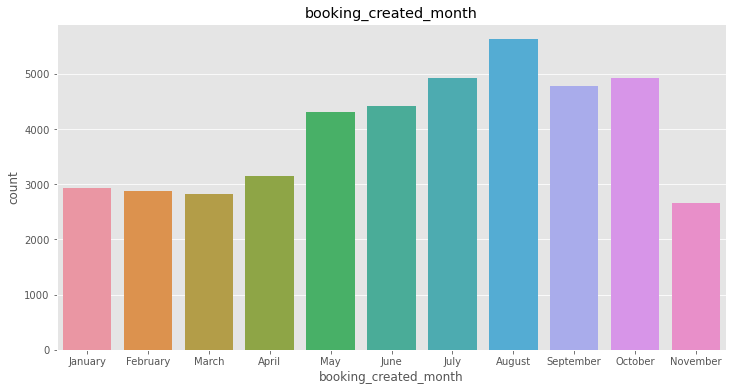

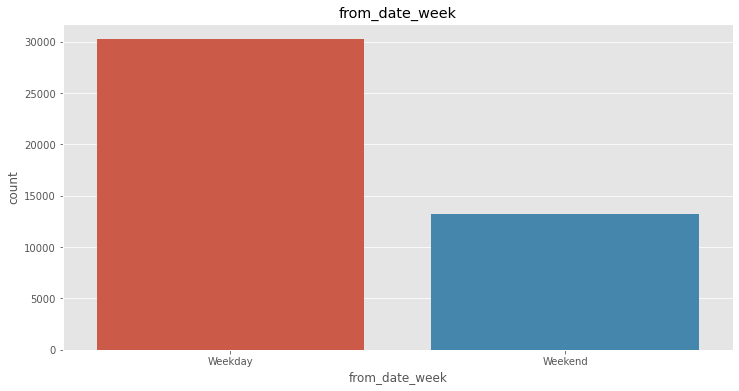

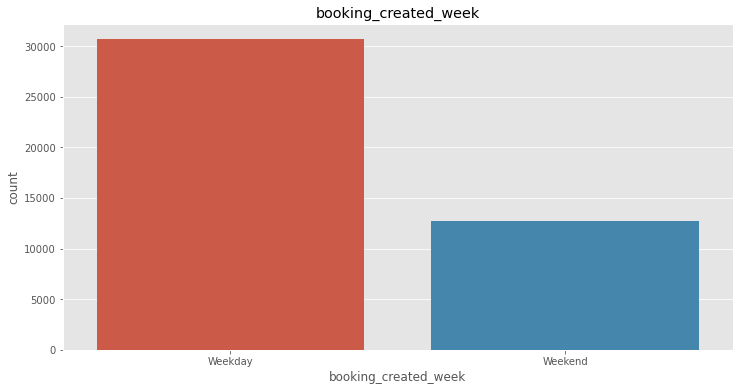

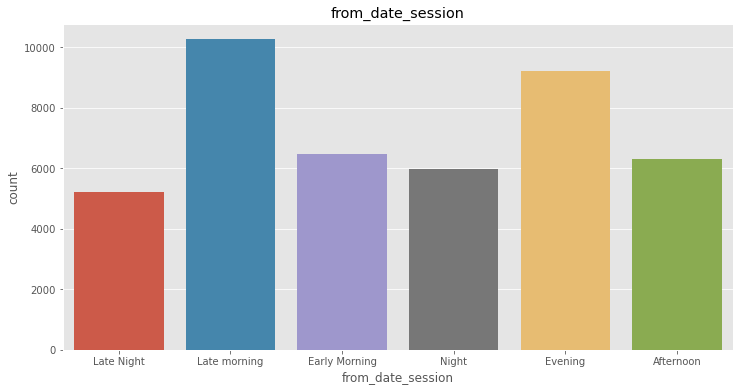

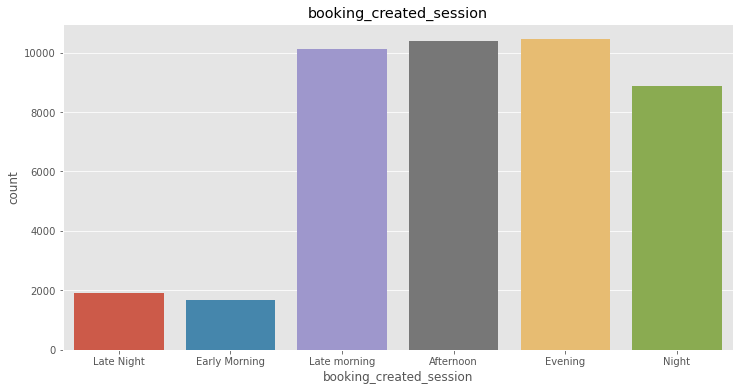

In [40]:
for col in df_cab.columns:
    if df_cab[col].dtype == 'object':
        plt.figure(figsize = (12,6))
        sns.countplot(x=col, data=df_cab)
        plt.title(col)

**Observations:**<br>
- The number of bookings remained almost constant from January to April, but then there was a noticeable increase from May to October, with bookings peaking in the summer months. This trend can be attributed to the summer season or summer break.<br>
- There is no booking data available for the month of December. All the bookings made for the month of December have been made in the month of Novemeber. <br>
- There is an increase in bookings made for the weekends. This is visible in the increased number of bookings on Friday and Saturday. The plot for weekday/weekend was influenced by the fact that Saturday and Sunday were considered for weekday/weekend classification, but most of the bookings for the weekend were made in anticipation on Friday and Saturday and there were less number of bookings on Sunday.
- Less number of people made bookings during Late Night or Early morning.<br>
- There was a noticeable increase in the number of bookings made during late morning or evening hours. This trend may indicate the travel patterns of office goers who typically work regular office hours.

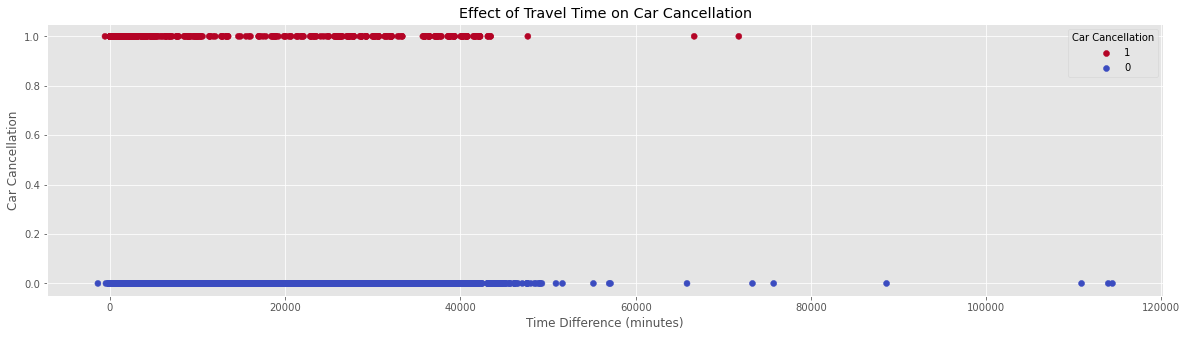

In [41]:
# Checking the influence of travel time on the Cancellation
plt.figure(figsize = (20,5))
scatter = plt.scatter(x = df_cab['time_diff'], y = df_cab['Car_Cancellation'], c=df_cab['Car_Cancellation'], cmap='coolwarm')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Car Cancellation')
plt.title('Effect of Travel Time on Car Cancellation')
handles = [scatter.legend_elements()[0][1], scatter.legend_elements()[0][0]]
labels = ['1', '0']
plt.legend(handles=handles, labels=labels, title='Car Cancellation', loc='upper right')
plt.show()

**Observations:**<br>
- Visually there is no pattern to be found between the travel time and the Cancellation.

## Checking for Outliers

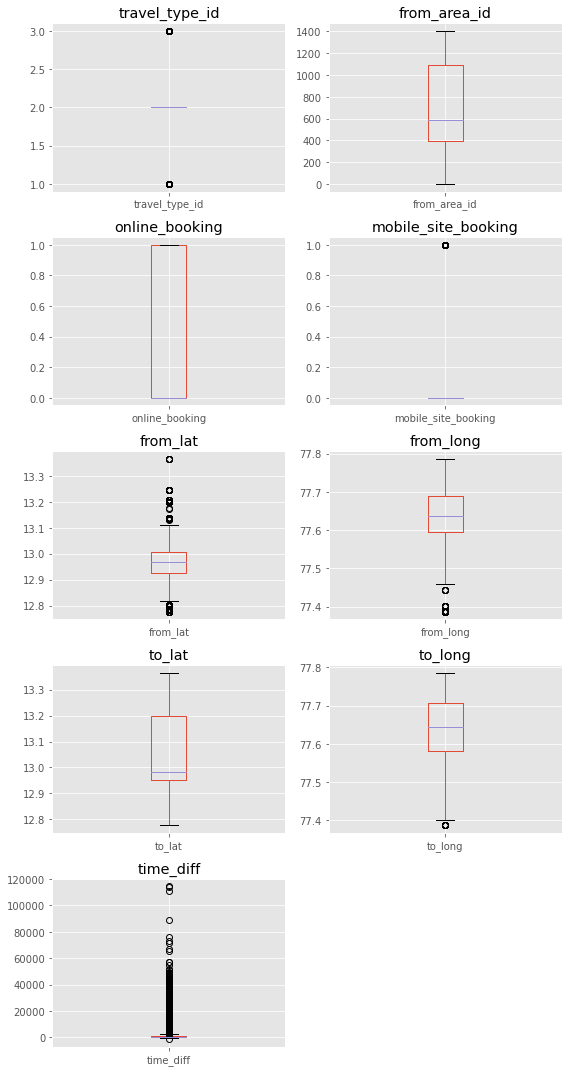

In [42]:
cols = ['travel_type_id', 'from_area_id', 'online_booking', 'mobile_site_booking', 'from_lat', 'from_long', 'to_lat',
       'to_long', 'time_diff']
fig,axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 15))
axes[-1, -1].set_visible(False)

for i,ax in enumerate(axes.flat):
    if i <len(cols):
        df_cab.boxplot(cols[i], ax=ax)
        ax.set_title(f'{cols[i]}')

plt.tight_layout()
plt.show()

- Since we have not been provided with a range of values or an area to which the geographic coordinate(Latitude and Longitude) should confirm to. Therefore we are not considering them to be outliers in this case.


In [43]:
# looking at the time difference outliers in depth

time_diff_Q1 = df_cab.time_diff.quantile(0.25)
time_diff_Q3 = df_cab.time_diff.quantile(0.75)

IQR = time_diff_Q3 - time_diff_Q1

UL = time_diff_Q3 + 1.5*(IQR)
LL = time_diff_Q1 - 1.5*(IQR)
print(f'Lower Limit(Q1 - 1.5*IQR): {(LL/60):.2f} Hrs')
print(f'Upper Limit(Q3 + 1.5*IQR): {(UL/60):.2f} Hrs')


within_lim = df_cab[(df_cab['time_diff'] > LL) & (df_cab['time_diff'] < UL)].shape[0]
print(f'Observations within the limits: {within_lim}')

below_lim = df_cab[(df_cab['time_diff'] < LL)].shape[0]
print(f'Observations below lower limit: {below_lim}')

above_lim = df_cab[(df_cab['time_diff'] > UL)].shape[0]
print(f'Observations above upper limit: {above_lim}')

outside_lim = df_cab.shape[0] - within_lim
print(f'Total Outliers: {outside_lim}')

print(f'Outlier percentage:{outside_lim / within_lim * 100: .2f} %')

max_time_diff = max(df_cab['time_diff'])/1440
print(f'Max time difference: {max_time_diff:.2f} Days')

Lower Limit(Q1 - 1.5*IQR): -20.27 Hrs
Upper Limit(Q3 + 1.5*IQR): 41.47 Hrs
Observations within the limits: 37835
Observations below lower limit: 1
Observations above upper limit: 5592
Total Outliers: 5596
Outlier percentage: 14.79 %
Max time difference: 79.45 Days


- Since the max time_difference value or outlier is 79 days, we can infer that it is plausible to make a cab ride booking around 2 and half months prior to travel date. So these outliers can be kept

In [44]:
# we can observe that there are some time difference which are negative. It does not seem plausible for the ride start time 
# to be starting before the ride booking time. So they need to be removed

neg_time_diff = df_cab[df_cab['time_diff'] < 0].shape[0]
print('No. of observations where time difference is negative: {}'.format(neg_time_diff))

df_cab.drop(df_cab[df_cab['time_diff'] < 0].index, axis = 0, inplace = True)

No. of observations where time difference is negative: 42


In [45]:
neg_time_diff = df_cab[df_cab['time_diff'] < 0].shape[0]
print('No. of observations where time difference is negative: {}'.format(neg_time_diff))

No. of observations where time difference is negative: 0


## Train Test Split

In [46]:
X = df_cab.drop('Car_Cancellation', axis = 1)
Y = df_cab['Car_Cancellation']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Missing Value Treatment

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34711 entries, 30204 to 15821
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         34711 non-null  int64  
 1   travel_type_id           34711 non-null  int64  
 2   from_area_id             34643 non-null  float64
 3   online_booking           34711 non-null  int64  
 4   mobile_site_booking      34711 non-null  int64  
 5   from_lat                 34641 non-null  float64
 6   from_long                34641 non-null  float64
 7   to_lat                   27364 non-null  float64
 8   to_long                  27364 non-null  float64
 9   from_date_day            34711 non-null  object 
 10  from_date_month          34711 non-null  object 
 11  booking_created_day      34711 non-null  object 
 12  booking_created_month    34711 non-null  object 
 13  from_date_week           34711 non-null  object 
 14  booking_created_week   

In [49]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8678 entries, 16371 to 6669
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         8678 non-null   int64  
 1   travel_type_id           8678 non-null   int64  
 2   from_area_id             8658 non-null   float64
 3   online_booking           8678 non-null   int64  
 4   mobile_site_booking      8678 non-null   int64  
 5   from_lat                 8655 non-null   float64
 6   from_long                8655 non-null   float64
 7   to_lat                   6904 non-null   float64
 8   to_long                  6904 non-null   float64
 9   from_date_day            8678 non-null   object 
 10  from_date_month          8678 non-null   object 
 11  booking_created_day      8678 non-null   object 
 12  booking_created_month    8678 non-null   object 
 13  from_date_week           8678 non-null   object 
 14  booking_created_week     

In [50]:
# for 'from_area_id' we can impute the median value

X_train.from_area_id.fillna(X_train.from_area_id.median(), inplace=True)
print(X_train.from_area_id.median())

590.0


In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34711 entries, 30204 to 15821
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         34711 non-null  int64  
 1   travel_type_id           34711 non-null  int64  
 2   from_area_id             34711 non-null  float64
 3   online_booking           34711 non-null  int64  
 4   mobile_site_booking      34711 non-null  int64  
 5   from_lat                 34641 non-null  float64
 6   from_long                34641 non-null  float64
 7   to_lat                   27364 non-null  float64
 8   to_long                  27364 non-null  float64
 9   from_date_day            34711 non-null  object 
 10  from_date_month          34711 non-null  object 
 11  booking_created_day      34711 non-null  object 
 12  booking_created_month    34711 non-null  object 
 13  from_date_week           34711 non-null  object 
 14  booking_created_week   

In [52]:
# doing same for X_test as well
X_test.from_area_id.fillna(X_train.from_area_id.median(), inplace=True)

In [53]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8678 entries, 16371 to 6669
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         8678 non-null   int64  
 1   travel_type_id           8678 non-null   int64  
 2   from_area_id             8678 non-null   float64
 3   online_booking           8678 non-null   int64  
 4   mobile_site_booking      8678 non-null   int64  
 5   from_lat                 8655 non-null   float64
 6   from_long                8655 non-null   float64
 7   to_lat                   6904 non-null   float64
 8   to_long                  6904 non-null   float64
 9   from_date_day            8678 non-null   object 
 10  from_date_month          8678 non-null   object 
 11  booking_created_day      8678 non-null   object 
 12  booking_created_month    8678 non-null   object 
 13  from_date_week           8678 non-null   object 
 14  booking_created_week     

In [54]:
# for the 'from_lat', 'from_long' we can impute the median values of 'from_lat', 'from_long' from the rows having 
# the same from_area_id as the missing value rows

# this is done taking into account the fact that different 'from_area_id' values may have different typical latitudes, 
# and is using this information to impute missing values in a more informed way than simply using the overall median value 
# of the 'from_lat' column

X_train['from_lat'].fillna(X_train.groupby('from_area_id')['from_lat'].transform('median'), inplace=True)
X_train['from_long'].fillna(X_train.groupby('from_area_id')['from_long'].transform('median'), inplace=True)

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34711 entries, 30204 to 15821
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         34711 non-null  int64  
 1   travel_type_id           34711 non-null  int64  
 2   from_area_id             34711 non-null  float64
 3   online_booking           34711 non-null  int64  
 4   mobile_site_booking      34711 non-null  int64  
 5   from_lat                 34709 non-null  float64
 6   from_long                34709 non-null  float64
 7   to_lat                   27364 non-null  float64
 8   to_long                  27364 non-null  float64
 9   from_date_day            34711 non-null  object 
 10  from_date_month          34711 non-null  object 
 11  booking_created_day      34711 non-null  object 
 12  booking_created_month    34711 non-null  object 
 13  from_date_week           34711 non-null  object 
 14  booking_created_week   

In [56]:
X_train[(X_train['from_lat'].isnull()) | (X_train['from_long'].isnull())]['from_area_id'].unique()

array([1397., 1396.])

In [57]:
df_cab[(df_cab['from_area_id'] == 1396) | (df_cab['from_area_id'] == 1397)]

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
39437,12,1,1396.0,0,0,NaN,NaN,NaN,NaN,0,Friday,October,Friday,October,Weekday,Weekday,Night,Evening,305.0
39445,65,1,1396.0,0,0,NaN,NaN,NaN,NaN,0,Friday,October,Friday,October,Weekday,Weekday,Night,Evening,313.0
39836,85,1,1396.0,0,0,NaN,NaN,NaN,NaN,0,Monday,October,Monday,October,Weekday,Weekday,Evening,Afternoon,373.0
40871,12,1,1397.0,0,1,NaN,NaN,NaN,NaN,0,Sunday,November,Friday,November,Weekend,Weekday,Early Morning,Evening,2079.0
40927,12,1,1397.0,0,1,NaN,NaN,NaN,NaN,0,Sunday,November,Saturday,November,Weekend,Weekend,Early Morning,Afternoon,979.0


In [58]:
# Since there are no other rows having the same from_area_id without non null values in the reqd column it wasn't imputed.
# We can impute the median values of the 'from_lat', 'from_long' from the df_cab instead

X_train['from_lat'].fillna(X_train['from_lat'].median(), inplace = True)
X_train['from_long'].fillna(X_train['from_long'].median(), inplace = True)

In [59]:
X_train[(X_train['from_area_id'] == 1396) | (X_train['from_area_id'] == 1397)]

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
40871,12,1,1397.0,0,1,12.96799,77.63575,NaN,NaN,Sunday,November,Friday,November,Weekend,Weekday,Early Morning,Evening,2079.0
39445,65,1,1396.0,0,0,12.96799,77.63575,NaN,NaN,Friday,October,Friday,October,Weekday,Weekday,Night,Evening,313.0


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34711 entries, 30204 to 15821
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         34711 non-null  int64  
 1   travel_type_id           34711 non-null  int64  
 2   from_area_id             34711 non-null  float64
 3   online_booking           34711 non-null  int64  
 4   mobile_site_booking      34711 non-null  int64  
 5   from_lat                 34711 non-null  float64
 6   from_long                34711 non-null  float64
 7   to_lat                   27364 non-null  float64
 8   to_long                  27364 non-null  float64
 9   from_date_day            34711 non-null  object 
 10  from_date_month          34711 non-null  object 
 11  booking_created_day      34711 non-null  object 
 12  booking_created_month    34711 non-null  object 
 13  from_date_week           34711 non-null  object 
 14  booking_created_week   

In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8678 entries, 16371 to 6669
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         8678 non-null   int64  
 1   travel_type_id           8678 non-null   int64  
 2   from_area_id             8678 non-null   float64
 3   online_booking           8678 non-null   int64  
 4   mobile_site_booking      8678 non-null   int64  
 5   from_lat                 8655 non-null   float64
 6   from_long                8655 non-null   float64
 7   to_lat                   6904 non-null   float64
 8   to_long                  6904 non-null   float64
 9   from_date_day            8678 non-null   object 
 10  from_date_month          8678 non-null   object 
 11  booking_created_day      8678 non-null   object 
 12  booking_created_month    8678 non-null   object 
 13  from_date_week           8678 non-null   object 
 14  booking_created_week     

In [62]:
# doing same for X_test as well
X_test['from_lat'].fillna(X_test.groupby('from_area_id')['from_lat'].transform('median'), inplace=True)
X_test['from_long'].fillna(X_test.groupby('from_area_id')['from_long'].transform('median'), inplace=True)

In [63]:
X_test[X_test['from_lat'].isnull()]

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
39836,85,1,1396.0,0,0,NaN,NaN,NaN,NaN,Monday,October,Monday,October,Weekday,Weekday,Evening,Afternoon,373.0
39437,12,1,1396.0,0,0,NaN,NaN,NaN,NaN,Friday,October,Friday,October,Weekday,Weekday,Night,Evening,305.0
40927,12,1,1397.0,0,1,NaN,NaN,NaN,NaN,Sunday,November,Saturday,November,Weekend,Weekend,Early Morning,Afternoon,979.0


In [64]:
X_test['from_lat'].fillna(X_train['from_lat'].median(), inplace = True)
X_test['from_long'].fillna(X_train['from_long'].median(), inplace = True)

In [65]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8678 entries, 16371 to 6669
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         8678 non-null   int64  
 1   travel_type_id           8678 non-null   int64  
 2   from_area_id             8678 non-null   float64
 3   online_booking           8678 non-null   int64  
 4   mobile_site_booking      8678 non-null   int64  
 5   from_lat                 8678 non-null   float64
 6   from_long                8678 non-null   float64
 7   to_lat                   6904 non-null   float64
 8   to_long                  6904 non-null   float64
 9   from_date_day            8678 non-null   object 
 10  from_date_month          8678 non-null   object 
 11  booking_created_day      8678 non-null   object 
 12  booking_created_month    8678 non-null   object 
 13  from_date_week           8678 non-null   object 
 14  booking_created_week     

In [66]:
# for the 'to_lat', 'to_long' we can impute the median values of 'to_lat', 'to_long' from the rows having 
# the same from_area_id as the missing value rows

X_train['to_lat'].fillna(X_train.groupby('from_area_id')['to_lat'].transform('median'), inplace=True)
X_train['to_long'].fillna(X_train.groupby('from_area_id')['to_long'].transform('median'), inplace=True)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34711 entries, 30204 to 15821
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         34711 non-null  int64  
 1   travel_type_id           34711 non-null  int64  
 2   from_area_id             34711 non-null  float64
 3   online_booking           34711 non-null  int64  
 4   mobile_site_booking      34711 non-null  int64  
 5   from_lat                 34711 non-null  float64
 6   from_long                34711 non-null  float64
 7   to_lat                   34700 non-null  float64
 8   to_long                  34700 non-null  float64
 9   from_date_day            34711 non-null  object 
 10  from_date_month          34711 non-null  object 
 11  booking_created_day      34711 non-null  object 
 12  booking_created_month    34711 non-null  object 
 13  from_date_week           34711 non-null  object 
 14  booking_created_week   

In [68]:
# Since there are no other rows having the same from_area_id without non null values in the reqd column it wasn't imputed.
# We can impute the median values of the 'to_lat', 'to_long' from the df_cab instead

X_train['to_lat'].fillna(X_train['to_lat'].median(), inplace = True)
X_train['to_long'].fillna(X_train['to_long'].median(), inplace = True)

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34711 entries, 30204 to 15821
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         34711 non-null  int64  
 1   travel_type_id           34711 non-null  int64  
 2   from_area_id             34711 non-null  float64
 3   online_booking           34711 non-null  int64  
 4   mobile_site_booking      34711 non-null  int64  
 5   from_lat                 34711 non-null  float64
 6   from_long                34711 non-null  float64
 7   to_lat                   34711 non-null  float64
 8   to_long                  34711 non-null  float64
 9   from_date_day            34711 non-null  object 
 10  from_date_month          34711 non-null  object 
 11  booking_created_day      34711 non-null  object 
 12  booking_created_month    34711 non-null  object 
 13  from_date_week           34711 non-null  object 
 14  booking_created_week   

In [70]:
# doing same for X_test as well

X_test['to_lat'].fillna(X_test.groupby('from_area_id')['to_lat'].transform('median'), inplace=True)
X_test['to_long'].fillna(X_test.groupby('from_area_id')['to_long'].transform('median'), inplace=True)

In [71]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8678 entries, 16371 to 6669
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         8678 non-null   int64  
 1   travel_type_id           8678 non-null   int64  
 2   from_area_id             8678 non-null   float64
 3   online_booking           8678 non-null   int64  
 4   mobile_site_booking      8678 non-null   int64  
 5   from_lat                 8678 non-null   float64
 6   from_long                8678 non-null   float64
 7   to_lat                   8655 non-null   float64
 8   to_long                  8655 non-null   float64
 9   from_date_day            8678 non-null   object 
 10  from_date_month          8678 non-null   object 
 11  booking_created_day      8678 non-null   object 
 12  booking_created_month    8678 non-null   object 
 13  from_date_week           8678 non-null   object 
 14  booking_created_week     

In [72]:
X_test['to_lat'].fillna(X_train['to_lat'].median(), inplace = True)
X_test['to_long'].fillna(X_train['to_long'].median(), inplace = True)

In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8678 entries, 16371 to 6669
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_model_id         8678 non-null   int64  
 1   travel_type_id           8678 non-null   int64  
 2   from_area_id             8678 non-null   float64
 3   online_booking           8678 non-null   int64  
 4   mobile_site_booking      8678 non-null   int64  
 5   from_lat                 8678 non-null   float64
 6   from_long                8678 non-null   float64
 7   to_lat                   8678 non-null   float64
 8   to_long                  8678 non-null   float64
 9   from_date_day            8678 non-null   object 
 10  from_date_month          8678 non-null   object 
 11  booking_created_day      8678 non-null   object 
 12  booking_created_month    8678 non-null   object 
 13  from_date_week           8678 non-null   object 
 14  booking_created_week     

In [74]:
X_train.head()

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
30204,12,2,1390.0,1,0,12.969368,77.641302,12.924878,77.566255,Wednesday,August,Wednesday,August,Weekday,Weekday,Late morning,Late morning,81.0
43228,12,2,413.0,0,0,12.921710,77.590170,13.199560,77.706880,Saturday,November,Friday,November,Weekend,Weekday,Afternoon,Evening,1047.0
18000,12,2,458.0,1,0,13.000370,77.727460,13.028530,77.546250,Thursday,June,Wednesday,June,Weekday,Weekday,Early Morning,Late morning,1087.0
31656,12,3,1036.0,1,0,12.925568,77.580568,13.199560,77.706880,Thursday,September,Wednesday,September,Weekday,Weekday,Late morning,Afternoon,1082.0
18394,12,2,585.0,0,0,12.976770,77.572700,12.936520,77.544810,Saturday,June,Saturday,June,Weekend,Weekend,Afternoon,Early Morning,291.0


In [75]:
X_test.head()

,vehicle_model_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
16371,12,2,1010.0,0,0,12.966910,77.749350,12.956410,77.640760,Sunday,June,Sunday,June,Weekend,Weekend,Afternoon,Late morning,182.0
18283,12,3,1039.0,0,0,12.979949,77.642913,13.028530,77.606805,Friday,June,Friday,June,Weekday,Weekday,Afternoon,Late morning,116.0
42209,89,2,393.0,1,0,13.199560,77.706880,12.976720,77.649270,Friday,November,Wednesday,November,Weekday,Weekday,Afternoon,Evening,2475.0
36470,12,2,905.0,1,0,13.006450,77.557480,13.199560,77.706880,Saturday,October,Saturday,October,Weekend,Weekend,Late Night,Evening,9205.0
40508,12,2,187.0,0,0,12.958920,77.527700,12.949764,77.643524,Wednesday,November,Thursday,October,Weekday,Weekday,Late morning,Late morning,8430.0


**Grouping from_area_id to bins of 100**

In [76]:
print('No. of Unique area_ids: {}'.format(df_cab['from_area_id'].nunique()))
print('Max Area Id: {}'.format(max(df_cab['from_area_id'])))
print('Min Area Id: {}'.format(min(df_cab['from_area_id'])))

No. of Unique area_ids: 598
Max Area Id: 1403.0
Min Area Id: 2.0


- from_area_id is a categorical column having 598 unique values. Encoding will lead to high dimensionality. 
- Nearby areas tend to have similar area ids. So we can group the area ids into bins of 100.

In [77]:
bins = [-1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1410]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', 
          '901-1000', '1001-1100', '1101-1200', '1201-1300', '1301-1403']
X_train['from_area_category'] = pd.cut(X_train['from_area_id'], bins=bins, labels=labels)

In [78]:
X_train.drop('from_area_id', axis = 1, inplace = True)

In [79]:
X_train.head()

,vehicle_model_id,travel_type_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff,from_area_category
30204,12,2,1,0,12.969368,77.641302,12.924878,77.566255,Wednesday,August,Wednesday,August,Weekday,Weekday,Late morning,Late morning,81.0,1301-1403
43228,12,2,0,0,12.921710,77.590170,13.199560,77.706880,Saturday,November,Friday,November,Weekend,Weekday,Afternoon,Evening,1047.0,401-500
18000,12,2,1,0,13.000370,77.727460,13.028530,77.546250,Thursday,June,Wednesday,June,Weekday,Weekday,Early Morning,Late morning,1087.0,401-500
31656,12,3,1,0,12.925568,77.580568,13.199560,77.706880,Thursday,September,Wednesday,September,Weekday,Weekday,Late morning,Afternoon,1082.0,1001-1100
18394,12,2,0,0,12.976770,77.572700,12.936520,77.544810,Saturday,June,Saturday,June,Weekend,Weekend,Afternoon,Early Morning,291.0,501-600


In [80]:
bins = [-1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1410]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', 
          '901-1000', '1001-1100', '1101-1200', '1201-1300', '1301-1403']
X_test['from_area_category'] = pd.cut(X_test['from_area_id'], bins=bins, labels=labels)

In [81]:
X_test.drop('from_area_id', axis = 1, inplace = True)

In [82]:
X_test.head()

,vehicle_model_id,travel_type_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff,from_area_category
16371,12,2,0,0,12.966910,77.749350,12.956410,77.640760,Sunday,June,Sunday,June,Weekend,Weekend,Afternoon,Late morning,182.0,1001-1100
18283,12,3,0,0,12.979949,77.642913,13.028530,77.606805,Friday,June,Friday,June,Weekday,Weekday,Afternoon,Late morning,116.0,1001-1100
42209,89,2,1,0,13.199560,77.706880,12.976720,77.649270,Friday,November,Wednesday,November,Weekday,Weekday,Afternoon,Evening,2475.0,301-400
36470,12,2,1,0,13.006450,77.557480,13.199560,77.706880,Saturday,October,Saturday,October,Weekend,Weekend,Late Night,Evening,9205.0,901-1000
40508,12,2,0,0,12.958920,77.527700,12.949764,77.643524,Wednesday,November,Thursday,October,Weekday,Weekday,Late morning,Late morning,8430.0,101-200


**Computing the distance between the from and to geographic co-ordinates**

In [83]:
#now that we have all the latitude and longitude co-ordiantes we can calculate the distance of travel for all rows

from geopy import distance

lat_lon_X_train = X_train[['from_lat', 'from_long', 'to_lat', 'to_long']]

X_train['Travel_Distance'] = lat_lon_X_train.apply(lambda row: distance.distance((row['from_lat'], row['from_long']), 
                                                                           (row['to_lat'], row['to_long'])).km, axis=1)


lat_lon_X_test = X_test[['from_lat', 'from_long', 'to_lat', 'to_long']]

X_test['Travel_Distance'] = lat_lon_X_test.apply(lambda row: distance.distance((row['from_lat'], row['from_long']), 
                                                                           (row['to_lat'], row['to_long'])).km, axis=1)

In [84]:
X_train.head()

,vehicle_model_id,travel_type_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff,from_area_category,Travel_Distance
30204,12,2,1,0,12.969368,77.641302,12.924878,77.566255,Wednesday,August,Wednesday,August,Weekday,Weekday,Late morning,Late morning,81.0,1301-1403,9.515078
43228,12,2,0,0,12.921710,77.590170,13.199560,77.706880,Saturday,November,Friday,November,Weekend,Weekday,Afternoon,Evening,1047.0,401-500,33.243110
18000,12,2,1,0,13.000370,77.727460,13.028530,77.546250,Thursday,June,Wednesday,June,Weekday,Weekday,Early Morning,Late morning,1087.0,401-500,19.902718
31656,12,3,1,0,12.925568,77.580568,13.199560,77.706880,Thursday,September,Wednesday,September,Weekday,Weekday,Late morning,Afternoon,1082.0,1001-1100,33.264001
18394,12,2,0,0,12.976770,77.572700,12.936520,77.544810,Saturday,June,Saturday,June,Weekend,Weekend,Afternoon,Early Morning,291.0,501-600,5.383832


In [85]:
X_train['Travel_Distance'].describe()

count    34711.000000
mean        16.183127
std         10.181953
min          0.000000
25%          8.048557
50%         13.188397
75%         25.305963
max         56.494496
Name: Travel_Distance, dtype: float64

In [86]:
X_test.head()

,vehicle_model_id,travel_type_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff,from_area_category,Travel_Distance
16371,12,2,0,0,12.966910,77.749350,12.956410,77.640760,Sunday,June,Sunday,June,Weekend,Weekend,Afternoon,Late morning,182.0,1001-1100,11.839289
18283,12,3,0,0,12.979949,77.642913,13.028530,77.606805,Friday,June,Friday,June,Weekday,Weekday,Afternoon,Late morning,116.0,1001-1100,6.650517
42209,89,2,1,0,13.199560,77.706880,12.976720,77.649270,Friday,November,Wednesday,November,Weekday,Weekday,Afternoon,Evening,2475.0,301-400,25.432381
36470,12,2,1,0,13.006450,77.557480,13.199560,77.706880,Saturday,October,Saturday,October,Weekend,Weekend,Late Night,Evening,9205.0,901-1000,26.812138
40508,12,2,0,0,12.958920,77.527700,12.949764,77.643524,Wednesday,November,Thursday,October,Weekday,Weekday,Late morning,Late morning,8430.0,101-200,12.608186


In [87]:
X_test['Travel_Distance'].describe()

count    8678.000000
mean       16.131007
std        10.171385
min         0.000000
25%         7.750093
50%        13.198953
75%        25.305963
max        59.538541
Name: Travel_Distance, dtype: float64

In [88]:
Y_train

30204    0
43228    0
18000    0
31656    0
18394    0
        ..
6270     0
11303    0
38195    0
860      1
15821    0
Name: Car_Cancellation, Length: 34711, dtype: int64

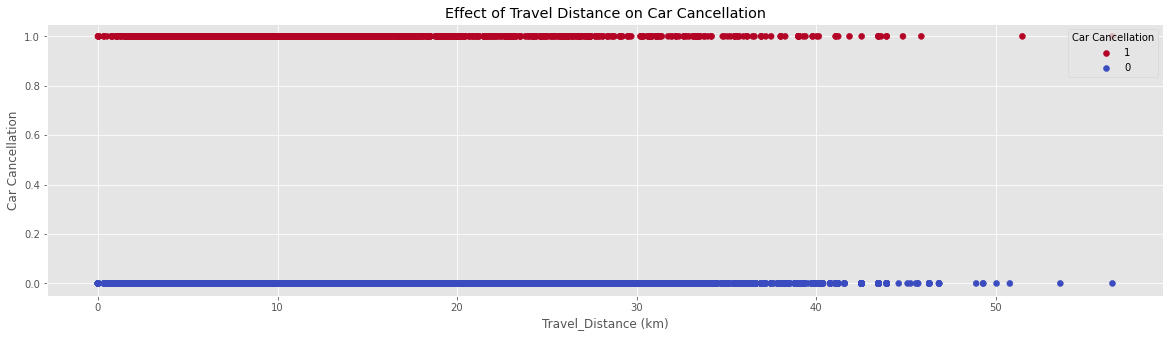

In [89]:
# Checking the influence of travel distance on the Cancellation
plt.figure(figsize = (20,5))
scatter = plt.scatter(x = X_train['Travel_Distance'], y = Y_train.values.tolist(), c=Y_train.values.tolist(), cmap='coolwarm')
plt.xlabel('Travel_Distance (km)')
plt.ylabel('Car Cancellation')
plt.title('Effect of Travel Distance on Car Cancellation')
handles = [scatter.legend_elements()[0][1], scatter.legend_elements()[0][0]]
labels = ['1', '0']
plt.legend(handles=handles, labels=labels, title='Car Cancellation', loc='upper right')
plt.show()

**Observations:**<br>
- Visually there is no pattern to be found between the travel distance and the Cancellation as for the same range of travel distance there are both instances of cancellation and non cancellation.

## Data Encoding

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34711 entries, 30204 to 15821
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vehicle_model_id         34711 non-null  int64   
 1   travel_type_id           34711 non-null  int64   
 2   online_booking           34711 non-null  int64   
 3   mobile_site_booking      34711 non-null  int64   
 4   from_lat                 34711 non-null  float64 
 5   from_long                34711 non-null  float64 
 6   to_lat                   34711 non-null  float64 
 7   to_long                  34711 non-null  float64 
 8   from_date_day            34711 non-null  object  
 9   from_date_month          34711 non-null  object  
 10  booking_created_day      34711 non-null  object  
 11  booking_created_month    34711 non-null  object  
 12  from_date_week           34711 non-null  object  
 13  booking_created_week     34711 non-null  object  
 14  from_da

In [91]:
X_train.head()

,vehicle_model_id,travel_type_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff,from_area_category,Travel_Distance
30204,12,2,1,0,12.969368,77.641302,12.924878,77.566255,Wednesday,August,Wednesday,August,Weekday,Weekday,Late morning,Late morning,81.0,1301-1403,9.515078
43228,12,2,0,0,12.921710,77.590170,13.199560,77.706880,Saturday,November,Friday,November,Weekend,Weekday,Afternoon,Evening,1047.0,401-500,33.243110
18000,12,2,1,0,13.000370,77.727460,13.028530,77.546250,Thursday,June,Wednesday,June,Weekday,Weekday,Early Morning,Late morning,1087.0,401-500,19.902718
31656,12,3,1,0,12.925568,77.580568,13.199560,77.706880,Thursday,September,Wednesday,September,Weekday,Weekday,Late morning,Afternoon,1082.0,1001-1100,33.264001
18394,12,2,0,0,12.976770,77.572700,12.936520,77.544810,Saturday,June,Saturday,June,Weekend,Weekend,Afternoon,Early Morning,291.0,501-600,5.383832


In [92]:
# Splitting the features into numerical and categorical for this purpose
X_train_num = X_train[['from_lat', 'from_long', 'to_lat', 'to_long', 'time_diff', 'Travel_Distance']]

X_train_char = X_train[['vehicle_model_id', 'travel_type_id', 'from_area_category', 'online_booking',
       'mobile_site_booking', 'from_date_day', 'from_date_month', 'booking_created_day',
       'booking_created_month', 'from_date_week', 'booking_created_week',
       'from_date_session', 'booking_created_session']]

In [93]:
X_test_num = X_test[['from_lat', 'from_long', 'to_lat', 'to_long', 'time_diff', 'Travel_Distance']]

X_test_char = X_test[['vehicle_model_id', 'travel_type_id', 'from_area_category', 'online_booking',
       'mobile_site_booking', 'from_date_day', 'from_date_month', 'booking_created_day',
       'booking_created_month', 'from_date_week', 'booking_created_week',
       'from_date_session', 'booking_created_session']]

In [94]:
X_train_char.head()

,vehicle_model_id,travel_type_id,from_area_category,online_booking,mobile_site_booking,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
30204,12,2,1301-1403,1,0,Wednesday,August,Wednesday,August,Weekday,Weekday,Late morning,Late morning
43228,12,2,401-500,0,0,Saturday,November,Friday,November,Weekend,Weekday,Afternoon,Evening
18000,12,2,401-500,1,0,Thursday,June,Wednesday,June,Weekday,Weekday,Early Morning,Late morning
31656,12,3,1001-1100,1,0,Thursday,September,Wednesday,September,Weekday,Weekday,Late morning,Afternoon
18394,12,2,501-600,0,0,Saturday,June,Saturday,June,Weekend,Weekend,Afternoon,Early Morning


In [95]:
X_train_char['booking_created_week'] = X_train_char['booking_created_week'].map({'Weekday':0,'Weekend':1})
X_train_char['from_date_week'] = X_train_char['from_date_week'].map({'Weekday':0,'Weekend':1})

In [96]:
X_train_char.head()

,vehicle_model_id,travel_type_id,from_area_category,online_booking,mobile_site_booking,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
30204,12,2,1301-1403,1,0,Wednesday,August,Wednesday,August,0,0,Late morning,Late morning
43228,12,2,401-500,0,0,Saturday,November,Friday,November,1,0,Afternoon,Evening
18000,12,2,401-500,1,0,Thursday,June,Wednesday,June,0,0,Early Morning,Late morning
31656,12,3,1001-1100,1,0,Thursday,September,Wednesday,September,0,0,Late morning,Afternoon
18394,12,2,501-600,0,0,Saturday,June,Saturday,June,1,1,Afternoon,Early Morning


In [97]:
X_train_char.rename(columns = {'from_date_week': 'from_date_weekend', 
                                                       'booking_created_week': 'booking_created_weekend'}, inplace = True)

In [98]:
X_train_char.head()

,vehicle_model_id,travel_type_id,from_area_category,online_booking,mobile_site_booking,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_weekend,booking_created_weekend,from_date_session,booking_created_session
30204,12,2,1301-1403,1,0,Wednesday,August,Wednesday,August,0,0,Late morning,Late morning
43228,12,2,401-500,0,0,Saturday,November,Friday,November,1,0,Afternoon,Evening
18000,12,2,401-500,1,0,Thursday,June,Wednesday,June,0,0,Early Morning,Late morning
31656,12,3,1001-1100,1,0,Thursday,September,Wednesday,September,0,0,Late morning,Afternoon
18394,12,2,501-600,0,0,Saturday,June,Saturday,June,1,1,Afternoon,Early Morning


In [99]:
X_test_char['booking_created_week'] = X_test_char['booking_created_week'].map({'Weekday':0,'Weekend':1})
X_test_char['from_date_week'] = X_test_char['from_date_week'].map({'Weekday':0,'Weekend':1})

In [100]:
X_test_char.rename(columns = {'from_date_week': 'from_date_weekend', 
                                                       'booking_created_week': 'booking_created_weekend'}, inplace = True)

In [101]:
X_test_char.head()

,vehicle_model_id,travel_type_id,from_area_category,online_booking,mobile_site_booking,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_weekend,booking_created_weekend,from_date_session,booking_created_session
16371,12,2,1001-1100,0,0,Sunday,June,Sunday,June,1,1,Afternoon,Late morning
18283,12,3,1001-1100,0,0,Friday,June,Friday,June,0,0,Afternoon,Late morning
42209,89,2,301-400,1,0,Friday,November,Wednesday,November,0,0,Afternoon,Evening
36470,12,2,901-1000,1,0,Saturday,October,Saturday,October,1,1,Late Night,Evening
40508,12,2,101-200,0,0,Wednesday,November,Thursday,October,0,0,Late morning,Late morning


In [102]:
X_train_char.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34711 entries, 30204 to 15821
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vehicle_model_id         34711 non-null  int64   
 1   travel_type_id           34711 non-null  int64   
 2   from_area_category       34711 non-null  category
 3   online_booking           34711 non-null  int64   
 4   mobile_site_booking      34711 non-null  int64   
 5   from_date_day            34711 non-null  object  
 6   from_date_month          34711 non-null  object  
 7   booking_created_day      34711 non-null  object  
 8   booking_created_month    34711 non-null  object  
 9   from_date_weekend        34711 non-null  int64   
 10  booking_created_weekend  34711 non-null  int64   
 11  from_date_session        34711 non-null  object  
 12  booking_created_session  34711 non-null  object  
dtypes: category(1), int64(6), object(6)
memory usage: 3.5+ MB


In [103]:
X_train_char['from_area_category'] = X_train_char['from_area_category'].astype(str)

In [104]:
X_test_char['from_area_category'] = X_test_char['from_area_category'].astype(str)

In [105]:
X_train_char.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34711 entries, 30204 to 15821
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vehicle_model_id         34711 non-null  int64 
 1   travel_type_id           34711 non-null  int64 
 2   from_area_category       34711 non-null  object
 3   online_booking           34711 non-null  int64 
 4   mobile_site_booking      34711 non-null  int64 
 5   from_date_day            34711 non-null  object
 6   from_date_month          34711 non-null  object
 7   booking_created_day      34711 non-null  object
 8   booking_created_month    34711 non-null  object
 9   from_date_weekend        34711 non-null  int64 
 10  booking_created_weekend  34711 non-null  int64 
 11  from_date_session        34711 non-null  object
 12  booking_created_session  34711 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.7+ MB


In [106]:
X_train_char_dum = pd.get_dummies(X_train_char, drop_first = True)

In [107]:
X_test_char_dum = pd.get_dummies(X_test_char, drop_first = True)

In [108]:
X_train_char_dum

,vehicle_model_id,travel_type_id,online_booking,mobile_site_booking,from_date_weekend,booking_created_weekend,from_area_category_1001-1100,from_area_category_101-200,from_area_category_1101-1200,from_area_category_1201-1300,from_area_category_1301-1403,from_area_category_201-300,from_area_category_301-400,from_area_category_401-500,from_area_category_501-600,from_area_category_601-700,from_area_category_701-800,from_area_category_801-900,from_area_category_901-1000,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,from_date_month_August,from_date_month_December,from_date_month_February,from_date_month_January,from_date_month_July,...,from_date_month_May,from_date_month_November,from_date_month_October,from_date_month_September,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,booking_created_day_Tuesday,booking_created_day_Wednesday,booking_created_month_August,booking_created_month_February,booking_created_month_January,booking_created_month_July,booking_created_month_June,booking_created_month_March,booking_created_month_May,booking_created_month_November,booking_created_month_October,booking_created_month_September,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Late morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Late morning,booking_created_session_Night
30204,12,2,1,0,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
43228,12,2,0,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
18000,12,2,1,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
31656,12,3,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
18394,12,2,0,0,1,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,12,2,0,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False
11303,12,3,0,0,1,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,Fal

In [109]:
X_train_char_dum_1 = pd.get_dummies(X_train_char['travel_type_id'], drop_first = True, prefix = 'Travel_type_id')

In [110]:
X_test_char_dum_1 = pd.get_dummies(X_test_char['travel_type_id'], drop_first = True, prefix = 'Travel_type_id')

In [111]:
X_train_char_dum_2 = pd.get_dummies(X_train_char['vehicle_model_id'], drop_first = True, prefix = 'vehicle_model_id')

In [112]:
X_test_char_dum_2 = pd.get_dummies(X_test_char['vehicle_model_id'], drop_first = True, prefix = 'vehicle_model_id')

In [113]:
X_train_char_combined = pd.concat([X_train_char_dum, X_train_char_dum_1, X_train_char_dum_2], axis=1)

In [114]:
X_test_char_combined = pd.concat([X_test_char_dum, X_test_char_dum_1, X_test_char_dum_2], axis=1)

In [115]:
X_train_char_combined

,vehicle_model_id,travel_type_id,online_booking,mobile_site_booking,from_date_weekend,booking_created_weekend,from_area_category_1001-1100,from_area_category_101-200,from_area_category_1101-1200,from_area_category_1201-1300,from_area_category_1301-1403,from_area_category_201-300,from_area_category_301-400,from_area_category_401-500,from_area_category_501-600,from_area_category_601-700,from_area_category_701-800,from_area_category_801-900,from_area_category_901-1000,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,from_date_month_August,from_date_month_December,from_date_month_February,from_date_month_January,from_date_month_July,...,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Late morning,booking_created_session_Night,Travel_type_id_2,Travel_type_id_3,vehicle_model_id_12,vehicle_model_id_13,vehicle_model_id_14,vehicle_model_id_17,vehicle_model_id_23,vehicle_model_id_24,vehicle_model_id_28,vehicle_model_id_30,vehicle_model_id_36,vehicle_model_id_39,vehicle_model_id_43,vehicle_model_id_54,vehicle_model_id_64,vehicle_model_id_65,vehicle_model_id_69,vehicle_model_id_70,vehicle_model_id_72,vehicle_model_id_75,vehicle_model_id_85,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91
30204,12,2,1,0,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
43228,12,2,0,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18000,12,2,1,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31656,12,3,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18394,12,2,0,0,1,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,12,2,0,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11303,12,3,0,0,1,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [116]:
X_train_char_combined.drop(['vehicle_model_id', 'travel_type_id'], axis = 1, inplace = True)

In [117]:
X_test_char_combined.drop(['vehicle_model_id', 'travel_type_id'], axis = 1, inplace = True)

In [118]:
X_train_char_combined

,online_booking,mobile_site_booking,from_date_weekend,booking_created_weekend,from_area_category_1001-1100,from_area_category_101-200,from_area_category_1101-1200,from_area_category_1201-1300,from_area_category_1301-1403,from_area_category_201-300,from_area_category_301-400,from_area_category_401-500,from_area_category_501-600,from_area_category_601-700,from_area_category_701-800,from_area_category_801-900,from_area_category_901-1000,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,from_date_month_August,from_date_month_December,from_date_month_February,from_date_month_January,from_date_month_July,from_date_month_June,from_date_month_March,...,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Late morning,booking_created_session_Night,Travel_type_id_2,Travel_type_id_3,vehicle_model_id_12,vehicle_model_id_13,vehicle_model_id_14,vehicle_model_id_17,vehicle_model_id_23,vehicle_model_id_24,vehicle_model_id_28,vehicle_model_id_30,vehicle_model_id_36,vehicle_model_id_39,vehicle_model_id_43,vehicle_model_id_54,vehicle_model_id_64,vehicle_model_id_65,vehicle_model_id_69,vehicle_model_id_70,vehicle_model_id_72,vehicle_model_id_75,vehicle_model_id_85,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91
30204,1,0,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
43228,0,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18000,1,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,...,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31656,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18394,0,0,1,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,0,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,...,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11303,0,0,1,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False

In [119]:
X_test_char_combined

,online_booking,mobile_site_booking,from_date_weekend,booking_created_weekend,from_area_category_1001-1100,from_area_category_101-200,from_area_category_1101-1200,from_area_category_1201-1300,from_area_category_1301-1403,from_area_category_201-300,from_area_category_301-400,from_area_category_401-500,from_area_category_501-600,from_area_category_601-700,from_area_category_701-800,from_area_category_801-900,from_area_category_901-1000,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,from_date_month_August,from_date_month_December,from_date_month_February,from_date_month_January,from_date_month_July,from_date_month_June,from_date_month_March,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Late morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Late morning,booking_created_session_Night,Travel_type_id_2,Travel_type_id_3,vehicle_model_id_10,vehicle_model_id_12,vehicle_model_id_17,vehicle_model_id_23,vehicle_model_id_24,vehicle_model_id_28,vehicle_model_id_30,vehicle_model_id_36,vehicle_model_id_54,vehicle_model_id_64,vehicle_model_id_65,vehicle_model_id_76,vehicle_model_id_85,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91
16371,0,0,1,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18283,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
42209,1,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
36470,1,0,1,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
40508,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0,0,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33151,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,F

- The number of columns in X_test are observed to be not matching with X_train. This is due to the fact that there are different model_ids present in the two datasets. We can add the missing columns in the dataset and assign a value of False.

In [120]:
missing_cols = set(X_test_char_combined.columns) - set(X_train_char_combined.columns)
print(missing_cols)

{'vehicle_model_id_76', 'vehicle_model_id_10'}


In [121]:
missing_cols = set(X_test_char_combined.columns) - set(X_train_char_combined.columns)
for col in missing_cols:
    X_train_char_combined[col] = False

In [122]:
X_train_char_combined.head()

,online_booking,mobile_site_booking,from_date_weekend,booking_created_weekend,from_area_category_1001-1100,from_area_category_101-200,from_area_category_1101-1200,from_area_category_1201-1300,from_area_category_1301-1403,from_area_category_201-300,from_area_category_301-400,from_area_category_401-500,from_area_category_501-600,from_area_category_601-700,from_area_category_701-800,from_area_category_801-900,from_area_category_901-1000,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,from_date_month_August,from_date_month_December,from_date_month_February,from_date_month_January,from_date_month_July,from_date_month_June,from_date_month_March,...,booking_created_session_Late morning,booking_created_session_Night,Travel_type_id_2,Travel_type_id_3,vehicle_model_id_12,vehicle_model_id_13,vehicle_model_id_14,vehicle_model_id_17,vehicle_model_id_23,vehicle_model_id_24,vehicle_model_id_28,vehicle_model_id_30,vehicle_model_id_36,vehicle_model_id_39,vehicle_model_id_43,vehicle_model_id_54,vehicle_model_id_64,vehicle_model_id_65,vehicle_model_id_69,vehicle_model_id_70,vehicle_model_id_72,vehicle_model_id_75,vehicle_model_id_85,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91,vehicle_model_id_76,vehicle_model_id_10
30204,1,0,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
43228,0,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18000,1,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,...,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31656,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18394,0,0,1,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [123]:
missing_cols = set(X_train_char_combined.columns) - set(X_test_char_combined.columns)
print(missing_cols)

{'vehicle_model_id_70', 'vehicle_model_id_72', 'vehicle_model_id_43', 'vehicle_model_id_13', 'vehicle_model_id_75', 'vehicle_model_id_39', 'vehicle_model_id_14', 'vehicle_model_id_69'}


In [124]:
missing_cols = set(X_train_char_combined.columns) - set(X_test_char_combined.columns)
for col in missing_cols:
    X_test_char_combined[col] = False

In [125]:
X_test_char_combined.head()

,online_booking,mobile_site_booking,from_date_weekend,booking_created_weekend,from_area_category_1001-1100,from_area_category_101-200,from_area_category_1101-1200,from_area_category_1201-1300,from_area_category_1301-1403,from_area_category_201-300,from_area_category_301-400,from_area_category_401-500,from_area_category_501-600,from_area_category_601-700,from_area_category_701-800,from_area_category_801-900,from_area_category_901-1000,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,from_date_month_August,from_date_month_December,from_date_month_February,from_date_month_January,from_date_month_July,from_date_month_June,from_date_month_March,...,booking_created_session_Late morning,booking_created_session_Night,Travel_type_id_2,Travel_type_id_3,vehicle_model_id_10,vehicle_model_id_12,vehicle_model_id_17,vehicle_model_id_23,vehicle_model_id_24,vehicle_model_id_28,vehicle_model_id_30,vehicle_model_id_36,vehicle_model_id_54,vehicle_model_id_64,vehicle_model_id_65,vehicle_model_id_76,vehicle_model_id_85,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91,vehicle_model_id_70,vehicle_model_id_72,vehicle_model_id_43,vehicle_model_id_13,vehicle_model_id_75,vehicle_model_id_39,vehicle_model_id_14,vehicle_model_id_69
16371,0,0,1,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18283,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
42209,1,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
36470,1,0,1,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
40508,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [126]:
# Reorder the columns of X_test_encoded to match the order of X_train_encoded columns
X_test_char_combined = X_test_char_combined.reindex(columns = X_train_char_combined.columns, fill_value=0)

In [127]:
X_test_char_combined.head()

,online_booking,mobile_site_booking,from_date_weekend,booking_created_weekend,from_area_category_1001-1100,from_area_category_101-200,from_area_category_1101-1200,from_area_category_1201-1300,from_area_category_1301-1403,from_area_category_201-300,from_area_category_301-400,from_area_category_401-500,from_area_category_501-600,from_area_category_601-700,from_area_category_701-800,from_area_category_801-900,from_area_category_901-1000,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,from_date_month_August,from_date_month_December,from_date_month_February,from_date_month_January,from_date_month_July,from_date_month_June,from_date_month_March,...,booking_created_session_Late morning,booking_created_session_Night,Travel_type_id_2,Travel_type_id_3,vehicle_model_id_12,vehicle_model_id_13,vehicle_model_id_14,vehicle_model_id_17,vehicle_model_id_23,vehicle_model_id_24,vehicle_model_id_28,vehicle_model_id_30,vehicle_model_id_36,vehicle_model_id_39,vehicle_model_id_43,vehicle_model_id_54,vehicle_model_id_64,vehicle_model_id_65,vehicle_model_id_69,vehicle_model_id_70,vehicle_model_id_72,vehicle_model_id_75,vehicle_model_id_85,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91,vehicle_model_id_76,vehicle_model_id_10
16371,0,0,1,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18283,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
42209,1,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
36470,1,0,1,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
40508,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [128]:
X_train_num.head()

,from_lat,from_long,to_lat,to_long,time_diff,Travel_Distance
30204,12.969368,77.641302,12.924878,77.566255,81.0,9.515078
43228,12.921710,77.590170,13.199560,77.706880,1047.0,33.243110
18000,13.000370,77.727460,13.028530,77.546250,1087.0,19.902718
31656,12.925568,77.580568,13.199560,77.706880,1082.0,33.264001
18394,12.976770,77.572700,12.936520,77.544810,291.0,5.383832


In [129]:
standard_Scaler=StandardScaler()

column_name = X_train_num.columns.tolist()
X_train_num = pd.DataFrame(standard_Scaler.fit_transform(X_train_num), columns = column_name)

In [130]:
X_train_num.head()

,from_lat,from_long,to_lat,to_long,time_diff,Travel_Distance
0,-0.149702,0.083801,-0.936947,-1.289775,-0.344873,-0.654898
1,-0.704390,-0.776907,1.675667,1.072505,-0.176093,1.675536
2,0.211128,1.534105,0.048930,-1.625827,-0.169104,0.365317
3,-0.659487,-0.938538,1.675667,1.072505,-0.169978,1.677588
4,-0.063551,-1.070981,-0.826215,-1.650017,-0.308181,-1.060646


In [131]:
X_test_num.head()

,from_lat,from_long,to_lat,to_long,time_diff,Travel_Distance
16371,12.966910,77.749350,12.956410,77.640760,182.0,11.839289
18283,12.979949,77.642913,13.028530,77.606805,116.0,6.650517
42209,13.199560,77.706880,12.976720,77.649270,2475.0,25.432381
36470,13.006450,77.557480,13.199560,77.706880,9205.0,26.812138
40508,12.958920,77.527700,12.949764,77.643524,8430.0,12.608186


In [132]:
X_test_num = pd.DataFrame(standard_Scaler.transform(X_test_num), columns = column_name)

In [133]:
X_test_num.head()

,from_lat,from_long,to_lat,to_long,time_diff,Travel_Distance
0,-0.178310,1.902580,-0.637033,-0.038208,-0.327226,-0.426627
1,-0.026551,0.110919,0.048930,-0.608598,-0.338757,-0.936240
2,2.529484,1.187680,-0.443856,0.104747,0.073407,0.908410
3,0.281892,-1.327180,1.675667,1.072505,1.249272,1.043922
4,-0.271305,-1.828469,-0.700246,0.008223,1.113864,-0.351111


In [134]:
X_train_num.shape

(34711, 6)

In [135]:
X_train_char_combined.shape

(34711, 88)

In [136]:
X_train_char_combined.reset_index(drop=True, inplace = True)

In [137]:
X_test_char_combined.reset_index(drop=True, inplace = True)

In [138]:
X_Train = pd.concat([X_train_num, X_train_char_combined], axis = 1)

In [139]:
X_Train

,from_lat,from_long,to_lat,to_long,time_diff,Travel_Distance,online_booking,mobile_site_booking,from_date_weekend,booking_created_weekend,from_area_category_1001-1100,from_area_category_101-200,from_area_category_1101-1200,from_area_category_1201-1300,from_area_category_1301-1403,from_area_category_201-300,from_area_category_301-400,from_area_category_401-500,from_area_category_501-600,from_area_category_601-700,from_area_category_701-800,from_area_category_801-900,from_area_category_901-1000,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,from_date_month_August,...,booking_created_session_Late morning,booking_created_session_Night,Travel_type_id_2,Travel_type_id_3,vehicle_model_id_12,vehicle_model_id_13,vehicle_model_id_14,vehicle_model_id_17,vehicle_model_id_23,vehicle_model_id_24,vehicle_model_id_28,vehicle_model_id_30,vehicle_model_id_36,vehicle_model_id_39,vehicle_model_id_43,vehicle_model_id_54,vehicle_model_id_64,vehicle_model_id_65,vehicle_model_id_69,vehicle_model_id_70,vehicle_model_id_72,vehicle_model_id_75,vehicle_model_id_85,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91,vehicle_model_id_76,vehicle_model_id_10
0,-0.149702,0.083801,-0.936947,-1.289775,-0.344873,-0.654898,1,0,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,...,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,-0.704390,-0.776907,1.675667,1.072505,-0.176093,1.675536,0,0,1,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.211128,1.534105,0.048930,-1.625827,-0.169104,0.365317,1,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,-0.659487,-0.938538,1.675667,1.072505,-0.169978,1.677588,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,-0.063551,-1.070981,-0.826215,-1.650017,-0.308181,-1.060646,0,0,1,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34706,0.422607,-0.018241,-0.798442,-0.231894,-0.355181,-0.727573,0,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
34707,-0.928555,0.412181,-0.443381,-0.992862,-0.348018,-0.439024,0,0,1,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,True,False,False,False,False,False,False,False,

In [140]:
X_test_num.shape

(8678, 6)

In [141]:
X_test_char_combined.shape

(8678, 88)

In [142]:
X_Test = pd.concat([X_test_num, X_test_char_combined], axis = 1)

In [143]:
X_Test

,from_lat,from_long,to_lat,to_long,time_diff,Travel_Distance,online_booking,mobile_site_booking,from_date_weekend,booking_created_weekend,from_area_category_1001-1100,from_area_category_101-200,from_area_category_1101-1200,from_area_category_1201-1300,from_area_category_1301-1403,from_area_category_201-300,from_area_category_301-400,from_area_category_401-500,from_area_category_501-600,from_area_category_601-700,from_area_category_701-800,from_area_category_801-900,from_area_category_901-1000,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,from_date_month_August,...,booking_created_session_Late morning,booking_created_session_Night,Travel_type_id_2,Travel_type_id_3,vehicle_model_id_12,vehicle_model_id_13,vehicle_model_id_14,vehicle_model_id_17,vehicle_model_id_23,vehicle_model_id_24,vehicle_model_id_28,vehicle_model_id_30,vehicle_model_id_36,vehicle_model_id_39,vehicle_model_id_43,vehicle_model_id_54,vehicle_model_id_64,vehicle_model_id_65,vehicle_model_id_69,vehicle_model_id_70,vehicle_model_id_72,vehicle_model_id_75,vehicle_model_id_85,vehicle_model_id_86,vehicle_model_id_87,vehicle_model_id_89,vehicle_model_id_90,vehicle_model_id_91,vehicle_model_id_76,vehicle_model_id_10
0,-0.178310,1.902580,-0.637033,-0.038208,-0.327226,-0.426627,0,0,1,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,-0.026551,0.110919,0.048930,-0.608598,-0.338757,-0.936240,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2.529484,1.187680,-0.443856,0.104747,0.073407,0.908410,1,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,0.281892,-1.327180,1.675667,1.072505,1.249272,1.043922,1,0,1,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,-0.271305,-1.828469,-0.700246,0.008223,1.113864,-0.351111,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8673,0.271999,0.364711,1.675667,1.072505,-0.333691,0.581446,0,0,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8674,-0.864425,-0.204415,-0.656722,-0.710817,-0.346270,-1.026860,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False,False,False,False

## Base Predictive Model

In [144]:
classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(X_Train, Y_train)

LogisticRegression(random_state=42)

In [145]:
Y_pred = classifier_lr.predict(X_Test)

In [146]:
Y_train_pred = classifier_lr.predict(X_Train)

In [147]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     32208
           1       0.58      0.15      0.24      2503

    accuracy                           0.93     34711
   macro avg       0.76      0.57      0.60     34711
weighted avg       0.91      0.93      0.91     34711



In [294]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

acc_lr = round(accuracy_score(Y_test, Y_pred), 5)
precision_lr = round(precision_score(Y_test, Y_pred), 5)
recall_lr = round(recall_score(Y_test, Y_pred), 5)
f1_score_lr = round(f1_score(Y_test, Y_pred), 5)
print(f'Logistic Regression Accuracy: {acc_lr}')
print(f'Logistic Regression Precision: {precision_lr}')
print(f'Logistic Regression Recall: {recall_lr}')
print(f'Logistic Regression F1 Score: {f1_score_lr}')

Logistic Regression Accuracy: 0.92948
Logistic Regression Precision: 0.54706
Logistic Regression Recall: 0.14809
Logistic Regression F1 Score: 0.23308


In [149]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8050
           1       0.55      0.15      0.23       628

    accuracy                           0.93      8678
   macro avg       0.74      0.57      0.60      8678
weighted avg       0.91      0.93      0.91      8678



## Feature Selection:

In [150]:
X_Train.shape

(34711, 94)

In [151]:
# Recursive Feature Elimination with Cross Validation
from sklearn.feature_selection import RFECV

classifier_lr_FSel = LogisticRegression(random_state = 42)
rfecv = RFECV(estimator = classifier_lr_FSel, step = 1, cv = 5, scoring = 'accuracy')
rfecv.fit(X_Train, Y_train)

RFECV(cv=5, estimator=LogisticRegression(random_state=42), scoring='accuracy')

In [152]:
print(f'Selected Features: {X_Train.columns[rfecv.get_support()]}')
print(f'Optimal Number of Features: {rfecv.n_features_}')

Selected Features: Index(['from_lat', 'from_long', 'to_lat', 'Travel_Distance', 'online_booking',
       'mobile_site_booking', 'from_area_category_101-200',
       'from_area_category_401-500', 'from_date_day_Sunday',
       'from_date_day_Thursday', 'from_date_month_August',
       'from_date_month_December', 'from_date_month_January',
       'from_date_month_June', 'from_date_month_March', 'from_date_month_May',
       'from_date_month_November', 'from_date_month_October',
       'booking_created_day_Sunday', 'booking_created_day_Tuesday',
       'booking_created_month_August', 'booking_created_month_February',
       'booking_created_month_January', 'booking_created_month_July',
       'booking_created_month_June', 'booking_created_month_May',
       'booking_created_month_November', 'booking_created_month_October',
       'booking_created_month_September', 'from_date_session_Evening',
       'from_date_session_Late Night', 'from_date_session_Night',
       'booking_created_session

In [153]:
X_Train_FSel = rfecv.transform(X_Train)

classifier_lr_FSel.fit(X_Train_FSel, Y_train)

LogisticRegression(random_state=42)

In [154]:
X_Test_FSel = rfecv.transform(X_Test)

Y_test_pred_fsel = classifier_lr_FSel.predict(X_Test_FSel)

In [242]:
# Checking Improvement in base model accuracy with optimized features
acc_lr_fsel = round(accuracy_score(Y_test, Y_test_pred_fsel), 5)
precision_lr_fsel = round(precision_score(Y_test, Y_test_pred_fsel), 5)
recall_lr_fsel = round(recall_score(Y_test, Y_test_pred_fsel), 5)
f1_score_lr_fsel = round(f1_score(Y_test, Y_test_pred_fsel), 5)
roc_auc_lr_fsel = round(roc_auc_score(Y_test, Y_test_pred_fsel), 5)
print(f'Logistic Regression Accuracy: {acc_lr_fsel}')
print(f'Logistic Regression Precision: {precision_lr_fsel}')
print(f'Logistic Regression Recall: {recall_lr_fsel}')
print(f'Logistic Regression F1 Score: {f1_score_lr_fsel}')

Logistic Regression Accuracy: 0.92867
Logistic Regression Precision: 0.52695
Logistic Regression Recall: 0.14013
Logistic Regression F1 Score: 0.22138


In [156]:
print(classification_report(Y_test, Y_test_pred_fsel))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8050
           1       0.53      0.14      0.22       628

    accuracy                           0.93      8678
   macro avg       0.73      0.57      0.59      8678
weighted avg       0.91      0.93      0.91      8678



- The optimized feature model, with fewer features, has slightly lower performance in terms of precision, recall, and F1 score compared to the base model with more features. However, the metrics of the optimized feature model is only slightly lower than that of the base model.
- Since the primary goal is to maximize precision and recall, the base model with more features is being choosen here.
- However, if we are concerned about overfitting or the computational cost of using a large number of features, the optimized feature model may be a better choice.

## Imbalance treatment

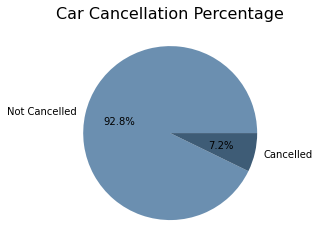

In [157]:
# checking the percentage of observations that are cancelled and not cancelled
colors = ['#6b8fb0', '#3e5c76']
plt.pie(Y_train.value_counts(), labels=['Not Cancelled', 'Cancelled'], autopct='%1.1f%%', colors=colors)
plt.title('Car Cancellation Percentage', fontsize=16)

plt.show()

We can conclude that the this dataset is immbalanced. <br>
Since the size of data is not very large we can go with an oversampling technique.<br>
Synthetic Minority Oversampling Technique(SMOTE) is being used in this case

In [158]:
# Synthetic Minority Oversampling Technique(SMOTE)
from collections import Counter
from imblearn.over_sampling import SMOTE

smote_oversampler = SMOTE(k_neighbors=2)

X_Train_bal, Y_Train_bal = smote_oversampler.fit_resample(X_Train, Y_train)
print(f'Training Target/Dependent Variable distribution {Counter(Y_Train_bal)}')
print(f'Testing Target/Dependent Variable distribution {Counter(Y_test)}')

Training Target/Dependent Variable distribution Counter({0: 32208, 1: 32208})
Testing Target/Dependent Variable distribution Counter({0: 8050, 1: 628})


In [159]:
classifier_lr_res = LogisticRegression(random_state = 42)
classifier_lr_res.fit(X_Train_bal, Y_Train_bal)

LogisticRegression(random_state=42)

In [160]:
Y_Train_bal_pred = classifier_lr_res.predict(X_Train_bal)

print(classification_report(Y_Train_bal, Y_Train_bal_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     32208
           1       0.89      0.89      0.89     32208

    accuracy                           0.89     64416
   macro avg       0.89      0.89      0.89     64416
weighted avg       0.89      0.89      0.89     64416



In [161]:
# Checking Improvement in model accuracy after imbalance treatment
Y_Test_bal_pred = classifier_lr_res.predict(X_Test)

print(classification_report(Y_test, Y_Test_bal_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.92      8050
           1       0.29      0.60      0.39       628

    accuracy                           0.87      8678
   macro avg       0.63      0.74      0.66      8678
weighted avg       0.92      0.87      0.89      8678



In [293]:
acc_lr_bal = round(accuracy_score(Y_test, Y_Test_bal_pred),5)
precision_lr_bal = round(precision_score(Y_test, Y_Test_bal_pred),5)
recall_lr_bal = round(recall_score(Y_test, Y_Test_bal_pred),5)
f1_score_lr_bal = round(f1_score(Y_test, Y_Test_bal_pred),5)

- The performance metrics after resampling show that while the recall for the minority class has improved, the precision has decreased. There is a trade-off between precision and recall that needs to be considered.

- Other techniques or using different algorithms need to be explored to improve the model's performance on the test set.


## Exploring different ML algorithms

### Logistic Regression:(with Hyperparameter Tuning)

In [162]:
# classifier_lr_res = LogisticRegression(random_state = 42)
# classifier_lr_res.fit(X_Train_bal, Y_Train_bal)

print(classification_report(Y_test, Y_Test_bal_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.92      8050
           1       0.29      0.60      0.39       628

    accuracy                           0.87      8678
   macro avg       0.63      0.74      0.66      8678
weighted avg       0.92      0.87      0.89      8678



In [163]:
parameters_1 = [{'penalty': ['l1','l2']}, {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

grid_search_lr = GridSearchCV(estimator = classifier_lr_res, param_grid = parameters_1, scoring = 'recall',
                             cv = 5, verbose = 0)

grid_search_lr.fit(X_Train_bal, Y_Train_bal)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='recall')

In [164]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_lr.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_lr.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_lr.best_estimator_))

GridSearch CV best score : 0.8841


Parameters that give the best results : 

 {'C': 1000}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000, random_state=42)


In [165]:
# Training the model with the optimized parameters
classifier_lr_hyp = LogisticRegression(C = 10, random_state = 42)
classifier_lr_hyp.fit(X_Train_bal, Y_Train_bal)

LogisticRegression(C=10, random_state=42)

In [166]:
Y_Test_hyp_pred = classifier_lr_hyp.predict(X_Test)

print(classification_report(Y_test, Y_Test_hyp_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8050
           1       0.30      0.60      0.40       628

    accuracy                           0.87      8678
   macro avg       0.63      0.74      0.66      8678
weighted avg       0.92      0.87      0.89      8678



In [292]:
acc_lr_hyp = round(accuracy_score(Y_test, Y_Test_hyp_pred),5)
precision_lr_hyp = round(precision_score(Y_test, Y_Test_hyp_pred),5)
recall_lr_hyp = round(recall_score(Y_test, Y_Test_hyp_pred),5)
f1_score_lr_hyp = round(f1_score(Y_test, Y_Test_hyp_pred),5)

- there is no significant improvement in the performance of the model after hyperparameter tuning.

### Decision Tree:

In [167]:
classifier_dt = DecisionTreeClassifier(random_state=42)


param_dt = {'max_depth':np.arange(1,11),
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

gridsearch_dt = GridSearchCV(classifier_dt, cv=10, param_grid=param_dt, n_jobs=-1)

gridsearch_dt.fit(X_Train_bal, Y_Train_bal)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': ['auto', 'sqrt', 'log2', None]})

In [168]:
print('Best Parameters using Grid search: \n',gridsearch_dt.best_params_)

Best Parameters using Grid search: 
 {'criterion': 'gini', 'max_depth': 10, 'max_features': None}


In [169]:
classifier_dt_hyp = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_features = None, random_state=42)

In [170]:
classifier_dt_hyp.fit(X_Train_bal, Y_Train_bal)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [171]:
Y_Test_dt_pred = classifier_dt_hyp.predict(X_Test)

print(classification_report(Y_test, Y_Test_dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8050
           1       0.22      0.71      0.33       628

    accuracy                           0.79      8678
   macro avg       0.60      0.76      0.61      8678
weighted avg       0.92      0.79      0.84      8678



In [291]:
acc_dt_hyp = round(accuracy_score(Y_test, Y_Test_dt_pred),5)
precision_dt_hyp = round(precision_score(Y_test, Y_Test_dt_pred),5)
recall_dt_hyp = round(recall_score(Y_test, Y_Test_dt_pred),5)
f1_score_dt_hyp = round(f1_score(Y_test, Y_Test_dt_pred),5)

### K-Nearest Neighbors (KNN):

Text(0, 0.5, 'Accuracy Rate')

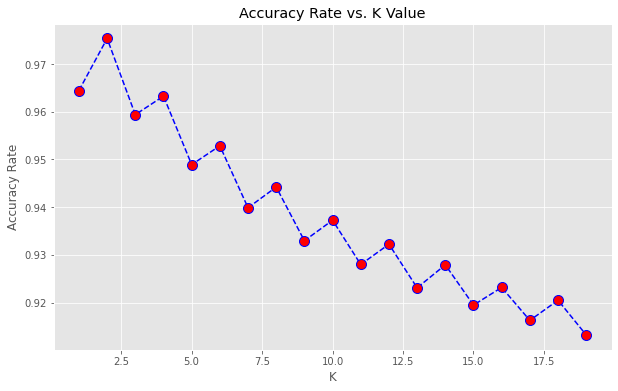

In [172]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_k_elbow = []

for i in range(1,20):
    classifier_KNN = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(classifier_KNN, X_Train_bal, Y_Train_bal, cv = 10)
    accuracy_k_elbow.append(score.mean())
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20), accuracy_k_elbow, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

- We do not want to go above the 0.95 accuracy rate as it may lead to overfitting and also we want to keep some tolerance so k = 9 with 0.933 accuracy looks a good choice.

In [173]:
classifier_KNN = KNeighborsClassifier(n_neighbors = 9)
classifier_KNN.fit(X_Train_bal, Y_Train_bal)

KNeighborsClassifier(n_neighbors=9)

In [174]:
Y_Test_KNN_pred = classifier_KNN.predict(X_Test)

print(classification_report(Y_test, Y_Test_KNN_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      8050
           1       0.27      0.62      0.37       628

    accuracy                           0.85      8678
   macro avg       0.62      0.75      0.64      8678
weighted avg       0.92      0.85      0.88      8678



In [290]:
acc_knn = round(accuracy_score(Y_test, Y_Test_KNN_pred),5)
precision_knn = round(precision_score(Y_test, Y_Test_KNN_pred),5)
recall_knn = round(recall_score(Y_test, Y_Test_KNN_pred),5)
f1_score_knn = round(f1_score(Y_test, Y_Test_KNN_pred),5)

### Naive Bayes:

In [175]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_Train_bal, Y_Train_bal)

GaussianNB()

In [176]:
Y_Test_NB_pred = classifier_nb.predict(X_Test)
print(classification_report(Y_test, Y_Test_NB_pred))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22      8050
           1       0.08      1.00      0.15       628

    accuracy                           0.18      8678
   macro avg       0.54      0.56      0.18      8678
weighted avg       0.93      0.18      0.21      8678



In [289]:
acc_nb = round(accuracy_score(Y_test, Y_Test_NB_pred),5)
precision_nb = round(precision_score(Y_test, Y_Test_NB_pred),5)
recall_nb = round(recall_score(Y_test, Y_Test_NB_pred),5)
f1_score_nb = round(f1_score(Y_test, Y_Test_NB_pred),5)

### Support Vector Machines (SVM):

In [177]:
classifier_svm = SVC(kernel = 'linear', random_state = 0)

classifier_svm.fit(X_Train_bal, Y_Train_bal)

SVC(kernel='linear', random_state=0)

In [179]:
Y_Test_SVM_pred = classifier_svm.predict(X_Test)
print(classification_report(Y_test, Y_Test_SVM_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.92      8050
           1       0.29      0.61      0.40       628

    accuracy                           0.87      8678
   macro avg       0.63      0.75      0.66      8678
weighted avg       0.92      0.87      0.89      8678



In [288]:
acc_svm = round(accuracy_score(Y_test, Y_Test_SVM_pred),5)
precision_svm = round(precision_score(Y_test, Y_Test_SVM_pred),5)
recall_svm = round(recall_score(Y_test, Y_Test_SVM_pred),5)
f1_score_svm = round(f1_score(Y_test, Y_Test_SVM_pred),5)

### Random Forest:

In [180]:
classifier_rf = RandomForestClassifier(random_state = 42)

In [183]:
rf_params = {'max_depth': np.arange(1,11),
            'bootstrap': [True, False],
            'max_features': ['auto', 'sqrt', 'log2', 'None'],
            'criterion': ['gini', 'entropy']}

gridsearch_rf = GridSearchCV(classifier_rf, param_grid = rf_params, cv = 3, verbose = 1, n_jobs = -1)

gridsearch_rf.fit(X_Train_bal, Y_Train_bal)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': ['auto', 'sqrt', 'log2', 'None']},
             verbose=1)

In [184]:
print('Best Parameters using Grid search: \n',gridsearch_rf.best_params_)

Best Parameters using Grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

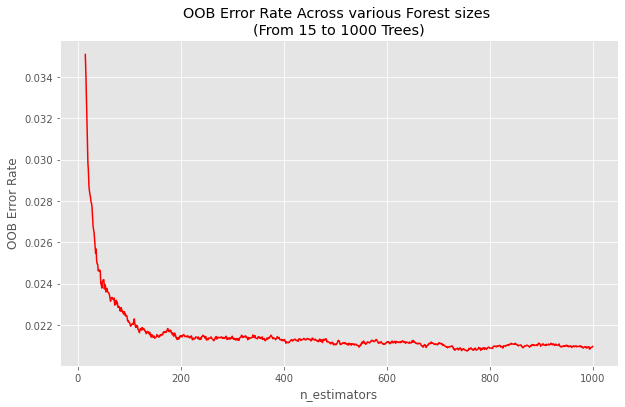

In [188]:
# Finding the optimal n_estimator value using OOB method
classifier_rf.set_params(oob_score=True)

min_estimator = 15
max_estimator = 1000

error_rate = {}

for i in range(min_estimator, max_estimator):
    classifier_rf.set_params(n_estimators = i)
    classifier_rf.fit(X_Train_bal, Y_Train_bal)
    
    oob_error = 1 - classifier_rf.oob_score_
    error_rate[i] = oob_error
    
oob_series = pd.Series(error_rate)

plt.figure(figsize=(10,6))
oob_series.plot(kind = 'line', color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

- We can observe that beyond n_estimators = 200 there is not much change in the OOB error rate value. 

In [189]:
classifier_rf.set_params(n_estimators=200, criterion = 'gini', max_depth = 10, max_features = 'auto', bootstrap = False, 
                         warm_start=False, oob_score=False)

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=200,
                       random_state=42)

In [190]:
classifier_rf.fit(X_Train_bal, Y_Train_bal)

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=200,
                       random_state=42)

In [192]:
Y_Test_RF_pred = classifier_rf.predict(X_Test)
print(classification_report(Y_test, Y_Test_RF_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8050
           1       0.27      0.74      0.39       628

    accuracy                           0.83      8678
   macro avg       0.62      0.79      0.65      8678
weighted avg       0.93      0.83      0.87      8678



In [287]:
acc_rf_hyp = round(accuracy_score(Y_test, Y_Test_RF_pred),5)
precision_rf_hyp = round(precision_score(Y_test, Y_Test_RF_pred),5)
recall_rf_hyp = round(recall_score(Y_test, Y_Test_RF_pred),5)
f1_score_rf_hyp = round(f1_score(Y_test, Y_Test_RF_pred),5)

In [212]:
# Top 10 features giving the highest Mean Decrease in Impurity
importances_rf = classifier_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

for f in range(0, 10):
    print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      X_Train_bal.columns[indices_rf[f]],
                      importances_rf[indices_rf[f]]))

1. The feature 'time_diff' has a Mean Decrease in Impurity of 0.08762
2. The feature 'to_lat' has a Mean Decrease in Impurity of 0.07324
3. The feature 'Travel_Distance' has a Mean Decrease in Impurity of 0.07179
4. The feature 'vehicle_model_id_12' has a Mean Decrease in Impurity of 0.07017
5. The feature 'booking_created_month_October' has a Mean Decrease in Impurity of 0.05754
6. The feature 'from_date_month_November' has a Mean Decrease in Impurity of 0.04648
7. The feature 'online_booking' has a Mean Decrease in Impurity of 0.04551
8. The feature 'to_long' has a Mean Decrease in Impurity of 0.04466
9. The feature 'from_date_session_Evening' has a Mean Decrease in Impurity of 0.04396
10. The feature 'from_lat' has a Mean Decrease in Impurity of 0.04305


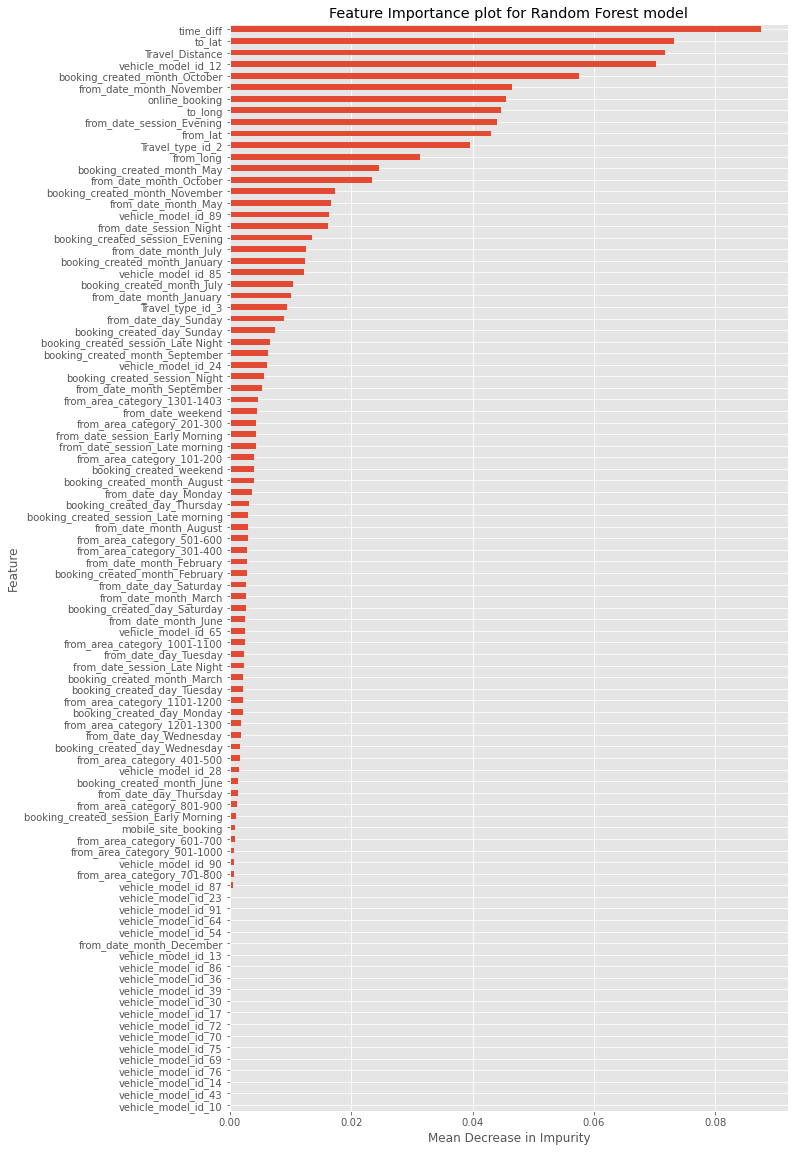

In [277]:
# Feature Importance plot for Random Forest model
plt.figure(figsize=(10, 20))
importances_rf = classifier_rf.feature_importances_
weights_rf = pd.Series(importances_rf,
                 index=X_Train_bal.columns.values)
weights_rf.sort_values().plot(kind = 'barh')
plt.title('Feature Importance plot for Random Forest model')
plt.xlabel('Mean Decrease in Impurity')
plt.ylabel('Feature')
plt.show()

### XG Boost:

In [236]:
classifier_xgb = XGBClassifier(random_state = 42)
classifier_xgb.fit(X_Train_bal, Y_Train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [258]:
Y_Test_XGB_pred = classifier_xgb.predict(X_Test)
print(classification_report(Y_test, Y_Test_XGB_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8050
           1       0.45      0.50      0.47       628

    accuracy                           0.92      8678
   macro avg       0.70      0.73      0.71      8678
weighted avg       0.92      0.92      0.92      8678



In [286]:
acc_xgb = round(accuracy_score(Y_test, Y_Test_XGB_pred),5)
precision_xgb = round(precision_score(Y_test, Y_Test_XGB_pred),5)
recall_xgb = round(recall_score(Y_test, Y_Test_XGB_pred),5)
f1_score_xgb = round(f1_score(Y_test, Y_Test_XGB_pred),5)

#### Hyperparameter Tuninig for XGBoost

In [254]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
}

classifier_xgb_hyp = XGBClassifier(random_state = 42)
gridsearch_xgb = GridSearchCV(estimator = classifier_xgb_hyp, param_grid = param_grid_xgb, n_jobs=-1, cv=3, 
                              scoring='recall', verbose = 1)
gridsearch_xgb.fit(X_Train_bal, Y_Train_bal)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [255]:
print('Best score:', gridsearch_xgb.best_score_)
print('Best score:', gridsearch_xgb.best_params_)

Best score: 0.9643877297565822
Best score: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1.0}


In [256]:
classifier_xgb_hyp = XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 100, 
                                   subsample = 1.0, random_state = 42)
classifier_xgb_hyp.fit(X_Train_bal, Y_Train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [259]:
Y_Test_XGB_hyp_pred = classifier_xgb_hyp.predict(X_Test)
print(classification_report(Y_test, Y_Test_XGB_hyp_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8050
           1       0.45      0.49      0.47       628

    accuracy                           0.92      8678
   macro avg       0.71      0.72      0.71      8678
weighted avg       0.92      0.92      0.92      8678



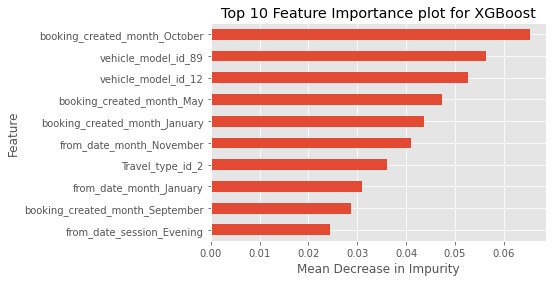

In [278]:
# Top 10 Feature Importance plot for XGBoost
feature_imp_xgb = classifier_xgb.feature_importances_
weights_xgb = pd.Series(feature_imp_xgb,
                 index=X_Train_bal.columns.values)
weights_xgb.sort_values()[-10:].plot(kind = 'barh')
plt.title('Top 10 Feature Importance plot for XGBoost')
plt.xlabel('Mean Decrease in Impurity')
plt.ylabel('Feature')
plt.show()

### Model Selection and Evaluation:

- To select the best model for predicting future ride cancellations in an online aggregation platform, we need to consider the appropriate evaluation metric. 
- Given the problem of predicting ride cancellations, it is crucial to focus on minimizing false negatives (canceled rides that are incorrectly classified as not canceled). This is because identifying potential cancellations is important for managing resources, optimizing availability, and providing a seamless experience to customers.
- Considering this, the most suitable evaluation metric would be Recall. Recall measures the proportion of actual positive cases (ride cancellations) that are correctly identified by the model. By maximizing recall, we aim to minimize the number of missed cancellations.

#### Cross Validation on training set:

In [261]:
classifiers = []
classifiers.append(classifier_lr)
classifiers.append(classifier_lr_res)
classifiers.append(classifier_lr_hyp)
classifiers.append(classifier_dt_hyp)
classifiers.append(classifier_KNN)
classifiers.append(classifier_nb)
classifiers.append(classifier_svm)
classifiers.append(classifier_rf)
classifiers.append(classifier_xgb)

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_Train_bal, Y_Train_bal, scoring = 'recall', cv = 5))

cv_mean=[]
cv_std=[]
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res=pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std':cv_std,
                   'Algorithm':['Logistic Regression imbalanced', 'Logistic Regression balanced', 'Logistic Regression with hyp', 'Decision Tree', 'KNN', 'Naive Bayes', 'SVM', 'Random Forest', 'XGBoost']})
cv_res.sort_values(by='Cross Validation Mean', ascending=False)


,Cross Validation Mean,Cross Validation Std,Algorithm
4,0.998789,0.001650,KNN
5,0.993790,0.001098,Naive Bayes
8,0.951040,0.084575,XGBoost
7,0.930856,0.026408,Random Forest
3,0.919741,0.024724,Decision Tree
6,0.885714,0.066455,SVM
2,0.883727,0.069545,Logistic Regression with hyp
0,0.882299,0.069520,Logistic Regression imbalanced
1,0.882299,0.069520,Logistic Regression balanced


#### Comparing metrics of ML models on test set

In [295]:
models = pd.DataFrame({'Model': ['Logistic Regression imbalanced', 'Logistic Regression balanced', 'Logistic Regression with hyp', 'Decision Tree', 'KNN', 'Naive Bayes', 'SVM', 'Random Forest', 'XGBoost'],
                       'Accuracy': [acc_lr, acc_lr_bal, acc_lr_hyp, acc_dt_hyp, acc_knn, acc_nb, acc_svm, acc_rf_hyp, acc_xgb],
                       'Precision': [precision_lr, precision_lr_bal, precision_lr_hyp, precision_dt_hyp, precision_knn, precision_nb, precision_svm, precision_rf_hyp, precision_xgb],
                       'Recall': [recall_lr, recall_lr_bal, recall_lr_hyp, recall_dt_hyp, recall_knn, recall_nb, recall_svm, recall_rf_hyp, recall_xgb],
                       'F1 Score': [f1_score_lr, f1_score_lr_bal, f1_score_lr_hyp, f1_score_dt_hyp, f1_score_knn, f1_score_nb, f1_score_svm, f1_score_rf_hyp, f1_score_xgb],                      
                      })

models.sort_values(by = 'Recall', ascending = False, ignore_index = True)

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.18472,0.08153,1.00000,0.15076
1,Random Forest,0.83372,0.26701,0.74363,0.39293
2,Decision Tree,0.79408,0.21800,0.71338,0.33395
3,KNN,0.84904,0.26739,0.62420,0.37440
4,SVM,0.86598,0.29439,0.60987,0.39710
5,Logistic Regression with hyp,0.86817,0.29685,0.60032,0.39726
6,Logistic Regression balanced,0.86633,0.29283,0.59873,0.39331
7,XGBoost,0.91922,0.44793,0.50000,0.47254
8,Logistic Regression imbalanced,0.92948,0.54706,0.14809,0.23308


- The recall value on the test set provides an indication of how well the models generalize to unseen data. 

- The model with the highest Recall (True Positive Rate) is the Naive Bayes model, which achieved a perfect recall score of 1.0. However, the Naive Bayes model has a very low accuracy, precision, and F1 score. This suggests that it may have a high number of false positives, resulting in poor overall performance.

- Considering a trade-off between recall and precision, we also need to take into account the balance between correctly identifying cancellations (recall) and minimizing false positives (precision).

- Given this, a more balanced choice could be the Random Forest model, which achieved a recall of 0.74363 along with relatively higher accuracy, precision, and F1 score compared to the other models. The Random Forest model strikes a reasonable balance between identifying cancellations and avoiding false positives.

#### ROC Curve:

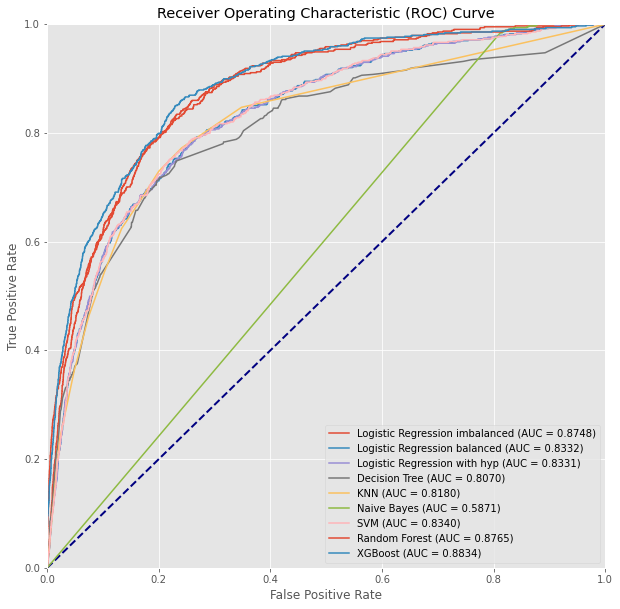

In [284]:
from sklearn.metrics import roc_curve, auc

Models = ['Logistic Regression imbalanced', 'Logistic Regression balanced', 'Logistic Regression with hyp', 
          'Decision Tree', 'KNN', 'Naive Bayes', 'SVM', 'Random Forest', 'XGBoost']

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
for name, classifier in zip(Models,classifiers):
    try:
        y_score = classifier.predict_proba(X_Test)[:,1]
    except AttributeError:
        # Some classifiers like SVM do not have predict_proba() available, so we fall back to decision_function()
        y_score = classifier.decision_function(X_Test)
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

- AUC value (Area Under the Receiver Operating Characteristic Curve) of 0.8765 for the Random Forest model indicates that the model has high predictive power and can effectively distinguish between positive and negative classes in the data.